**Importing Libraries**

In [ ]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt


#Datasets

##Loading the data

1. Data loading and storage

In [ ]:
from google.colab import files

# Upload the 'temper.npz' file
uploaded = files.upload()

Saving digits.npz to digits.npz
Saving temper.npz to temper.npz


*Temperature*

In [ ]:
# Load the data
temperature_data = np.load("temper.npz")

# Extraction
x1 = temperature_data["data"][:, :12]
villes = temperature_data["villes"]
varnames = temperature_data["varname"]


*Digits*

In [ ]:
# Load the data
digits_data = np.load("digits.npz")

# Extraction
x2 = digits_data["x"] / 255.0  # Scale values between [0, 1]
y2 = digits_data["y"].ravel()


2. *Do a quick look at the data, compute the mean values for each variable and visualize it (with pl.plot
for the temperature signals and pl.imshow for the images in digits data).*

**Temperature**

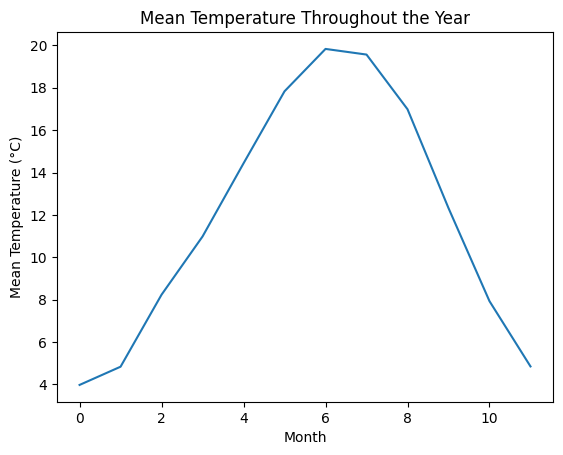

In [ ]:
# Compute mean values for each variable
mean_temperature = np.mean(x1, axis=0)

# Visualize the mean temperature
plt.plot(mean_temperature)
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.title("Mean Temperature Throughout the Year")
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

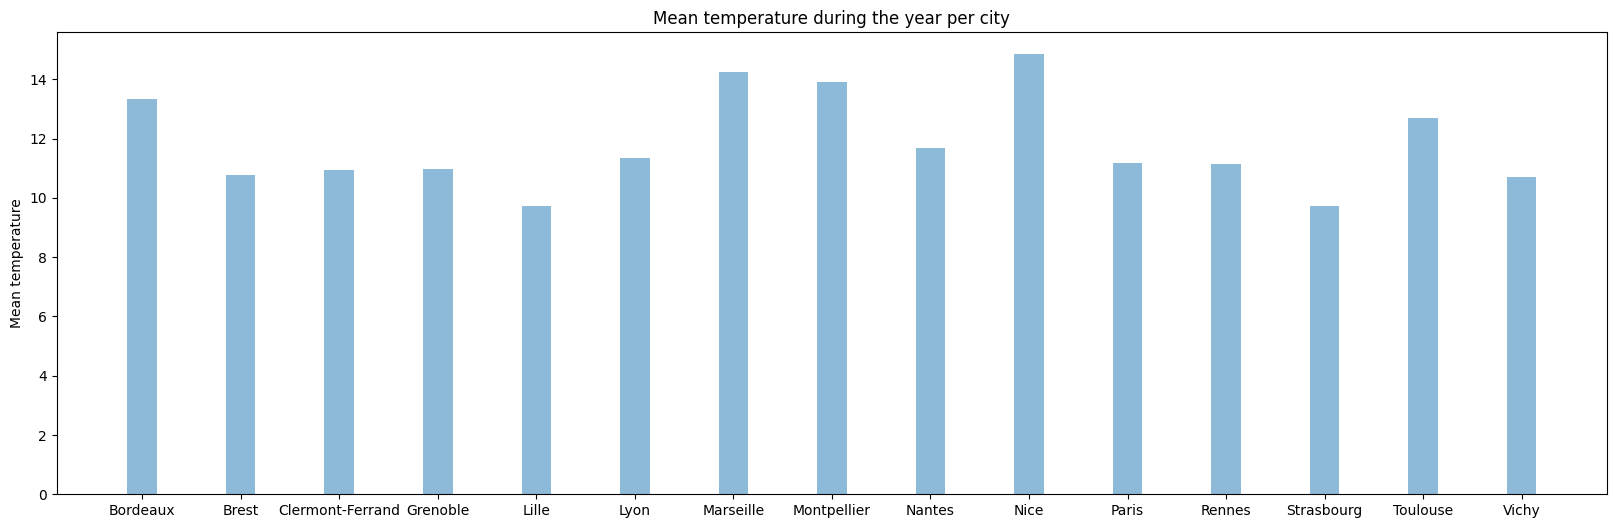

In [ ]:
means_per_city = {}

for i,ville in enumerate(villes):
  means_per_city[ville] = x1[i, :].mean()
fig = plt.figure(figsize=(20,6))
plt.bar(means_per_city.keys(), means_per_city.values(), width=0.3, alpha=0.5)
plt.ylabel("Mean temperature")
plt.title("Mean temperature during the year per city")
plt.show

*Comment:* As expected, the average temperature is low in winter, then, from the 3rd month onwards, it rises to reach a peak in July. Finally, it falls back to its level at the start of the year.

Moreover, the southern cities have a higher mean temperature.

**Digits**

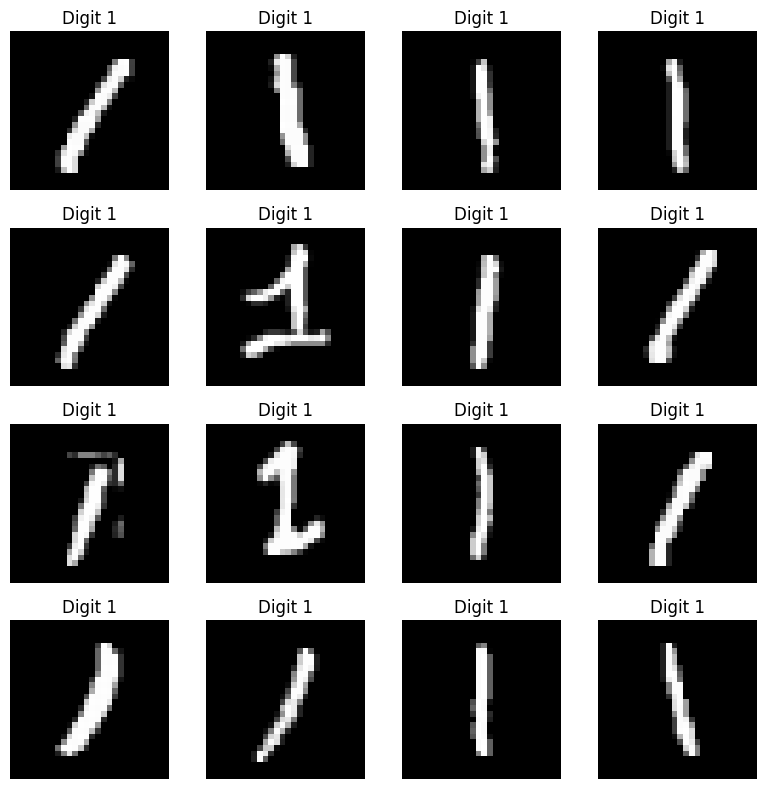

In [ ]:
# Visualize some examples from the digits dataset
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x2[i].reshape(28, 28), cmap='gray')
    plt.title(f"Digit {y2[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


3. (Bonus) Reproduction of Figures.

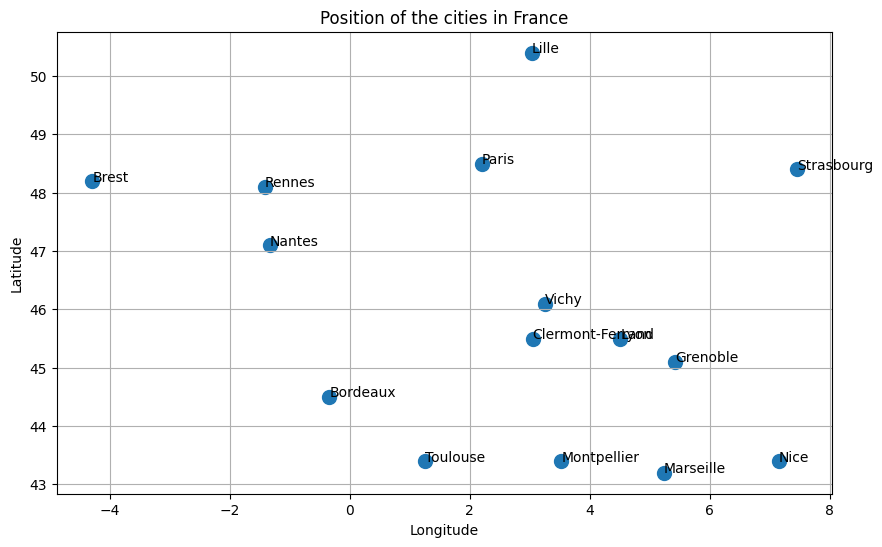

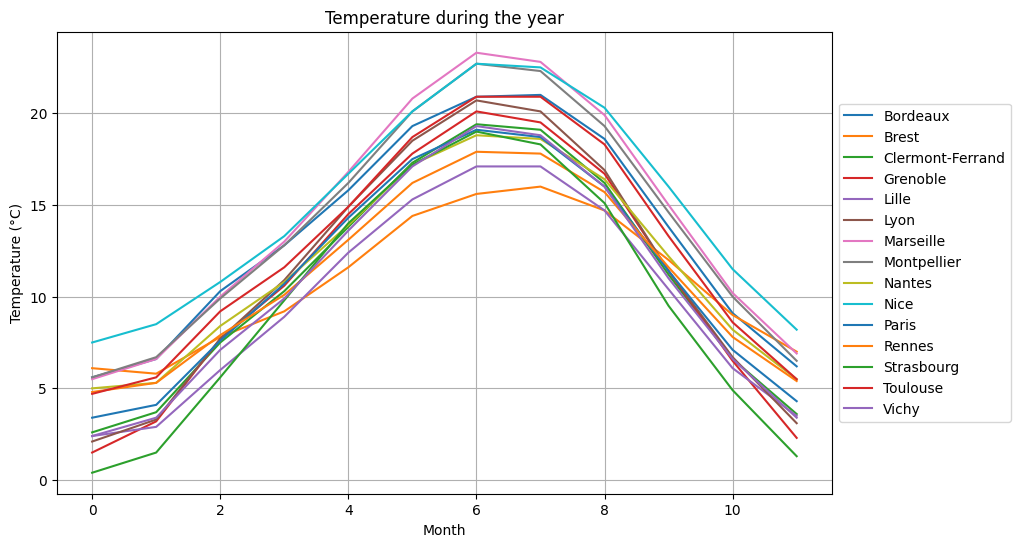

In [ ]:
# Visualization 1
plt.figure(figsize=(10, 6))
plt.scatter(temperature_data["data"][:, 13], temperature_data["data"][:, 12], marker='o', s=100)
for i, ville in enumerate(villes):
    plt.text(temperature_data["data"][i, 13], temperature_data["data"][i, 12], ville)
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Position of the cities in France")


# Visualization 2
plt.figure(figsize=(10, 6))
for i in range(len(villes)):
    plt.plot(x1[i, :], label=villes[i])
plt.grid()
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature during the year")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()


#Clustering

##For both datasets

1. *Perform K-means clustering on the data (K = 3, sklearn.cluster.Kmeans) and store the cluster centroids and the estimated classes for all samples*

In [ ]:
from sklearn.cluster import KMeans

K=3

# For temperature_data
kmeans1 = KMeans(n_clusters=K, random_state=0).fit(x1)
clusters1 = kmeans1.fit_predict(x1)
centroids1 = kmeans1.cluster_centers_
labels1 = kmeans1.labels_

# For digits_data
kmeans2 = KMeans(n_clusters=K, random_state=0).fit(x2)
clusters2 = kmeans2.fit_predict(x2)
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. *Plot the centroids and interpret them (how are the samples clustered? by class on digits? geographical position for the cities?)*

**Temperature Data**

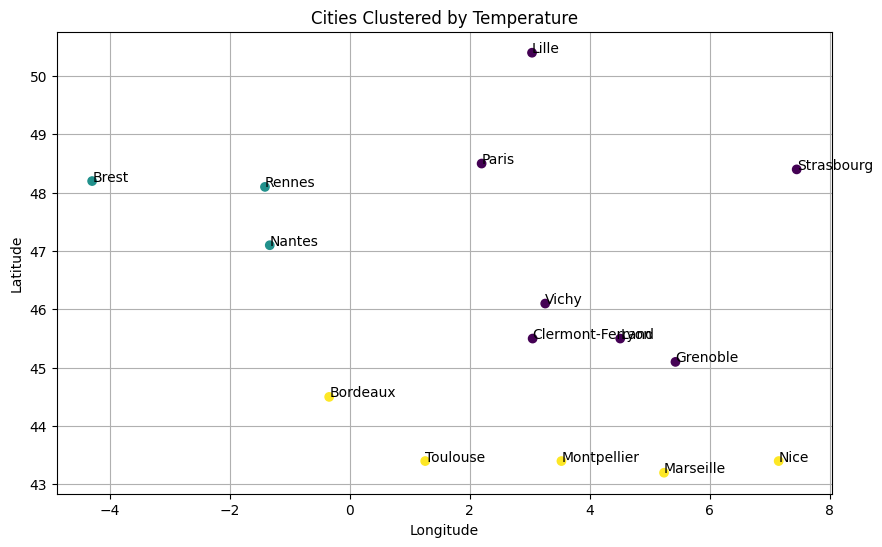

In [ ]:
# Plot the Kmeans for temperature data
plt.figure(figsize=(10, 6))
plt.scatter(temperature_data["data"][:, 13], temperature_data["data"][:, 12], c=clusters1, cmap='viridis')

# Add city names
for i, city in enumerate(villes):
    plt.text(temperature_data["data"][i, 13], temperature_data["data"][i, 12], city)

plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cities Clustered by Temperature")
plt.show()

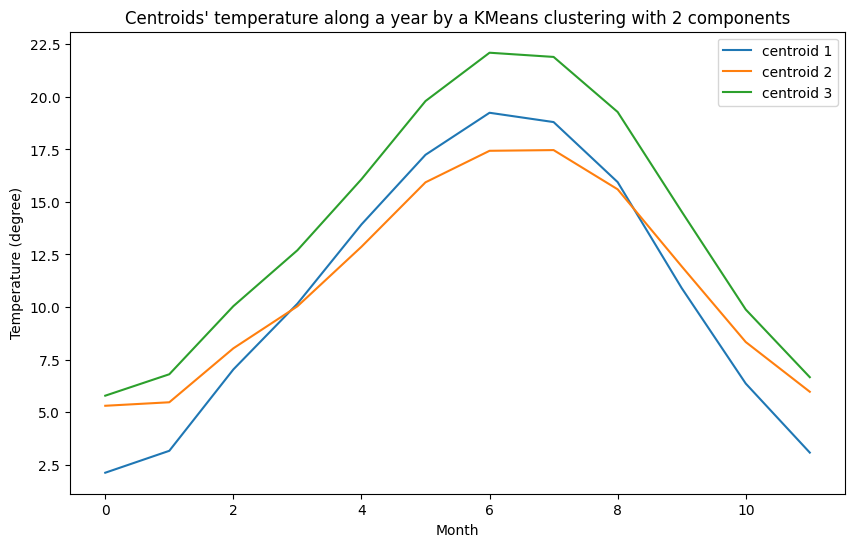

In [ ]:
fig = plt.figure(figsize=(10,6))

for i in range(len(centroids1)):
    plt.plot(centroids1[i], label="centroid {}".format(i+1))
plt.xlabel("Month")
plt.ylabel("Temperature (degree)")
plt.title("Centroids' temperature along a year by a KMeans clustering with 2 components")
plt.legend()
plt.show()

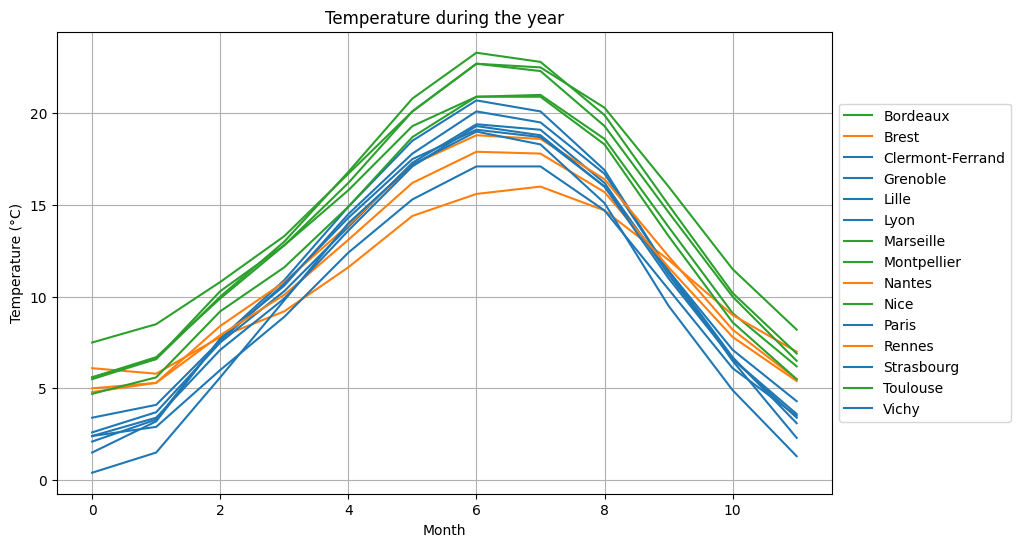

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(len(villes)):
    plt.plot(x1[i, :], label=villes[i], color='C'+str(labels1[i]))
plt.grid()
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Temperature during the year")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

*Comment:* We clustered the cities by temperature, but it is coherent with their geographical positions with southern cities, western cities and the others.

**Digits Data**

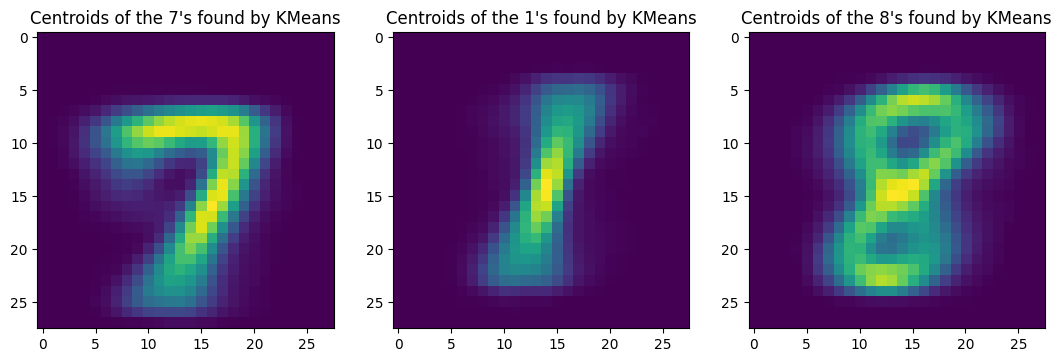

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13,6))

for i, digit in enumerate([7,1,8]):
  ax[i].imshow(centroids2[i].reshape(28,28))
  ax[i].set_title("""Centroids of the {}'s found by KMeans""".format(digit))
plt.show()

*Comment:* As the images are blured, they are obviously not images from the dataset. Indeed, these centroids correspond to the superposition of the images from their respective cluster.

3. *Change the value of K and repeat the two previous steps. What are good values in your opinion and why?*

We are going to use the Elbow method and compute the silhouette score to search the best K

**Temperature Data**

In [ ]:
K_range = range(2,11)

inertia = []

for K in K_range:
  kmeans1 = KMeans(n_clusters=K, random_state=0)
  kmeans1.fit(x1)
  inerti = kmeans1.inertia_
  inertia.append(inerti)

print(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[198.28700000000003, 118.74895238095237, 88.19466666666666, 70.75666666666666, 41.17833333333334, 28.47833333333334, 18.810000000000002, 10.665000000000003, 7.305]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


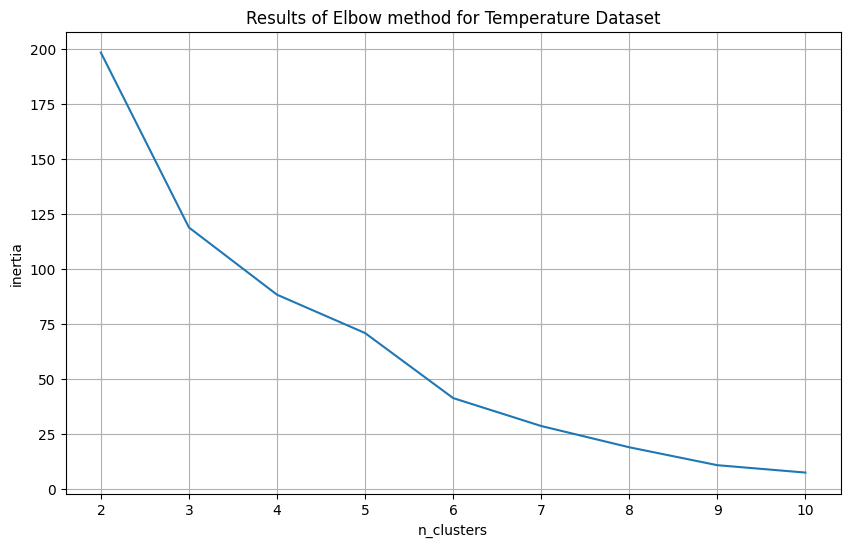

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot(K_range, inertia)
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.title("Results of Elbow method for Temperature Dataset")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.5377405725883412, 0.45213888750310727, 0.4239291832986434, 0.28456006646352017, 0.3721701374392658, 0.35579274587524723, 0.3484442715904322, 0.3378736280869233, 0.2816274266699445]


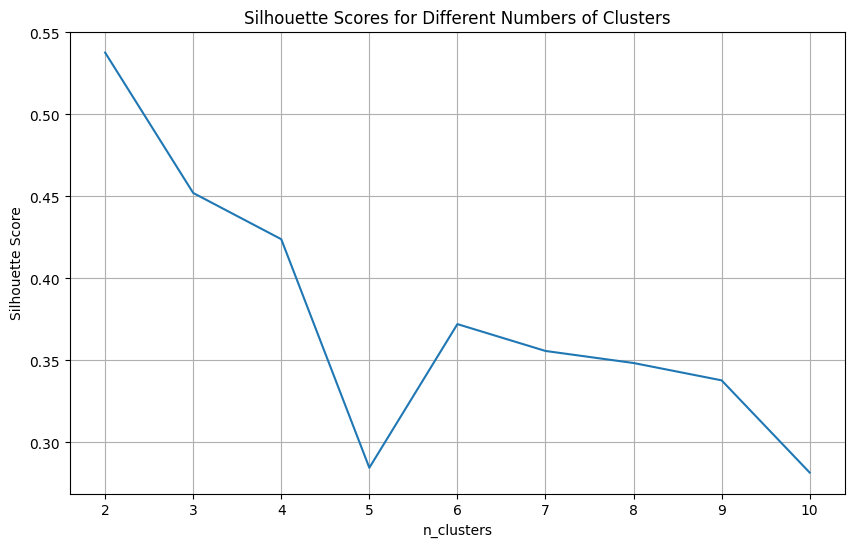

In [ ]:
from sklearn.metrics import silhouette_score

K_range = range(2,11)

silhouette_scores = []

for K in K_range:
    kmeans1 = KMeans(n_clusters=K, random_state=0)
    kmeans1.fit(x1)
    score = silhouette_score(x1, kmeans1.labels_)
    silhouette_scores.append(score)

print(silhouette_scores)

fig = plt.figure(figsize=(10,6))
plt.plot(K_range, silhouette_scores)
plt.xlabel("n_clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.grid(True)
plt.show()


*Comment:* The best K seems to be 3 by Elbow method and 2 by silhouette score method. Then it is more accurate to form two clusters of cities.

**Digits Data**

In [ ]:
inertia = []

for K in K_range:
  kmeans2 = KMeans(n_clusters=K, random_state=0)
  kmeans2.fit(x2)
  inerti = kmeans2.inertia_
  inertia.append(inerti)

print(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[116025.38430416759, 104580.6224455318, 97775.09767160531, 93367.28533246406, 89119.72759714919, 86728.72080121806, 84415.50227923875, 82644.18994061135, 81181.02547111093]


<function matplotlib.pyplot.show(close=None, block=None)>

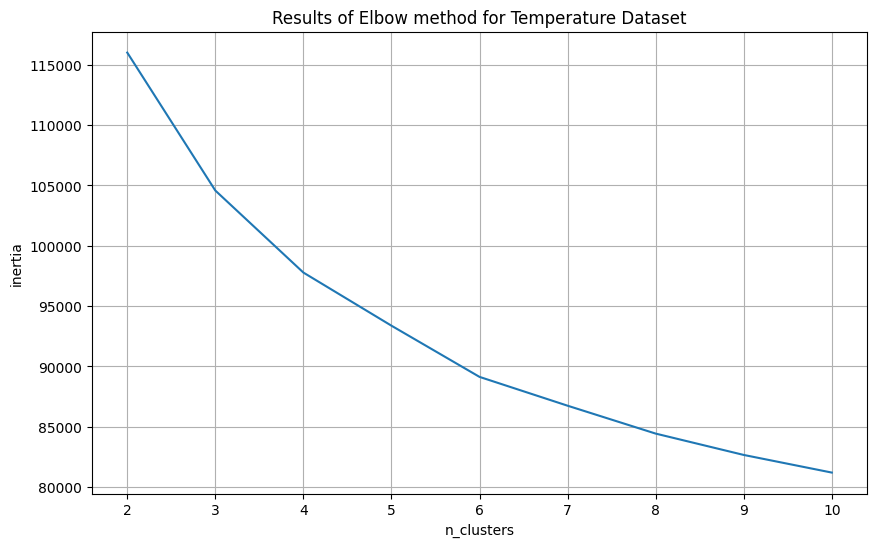

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot(K_range, inertia)
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.title("Results of Elbow method for Temperature Dataset")
plt.grid(True)
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.13457235996331138, 0.14081339146945213, 0.10923482085768331, 0.11428298186845572, 0.12344708835666368, 0.12354725956848457, 0.10239894031657393, 0.10318500019525964, 0.105228478837154]


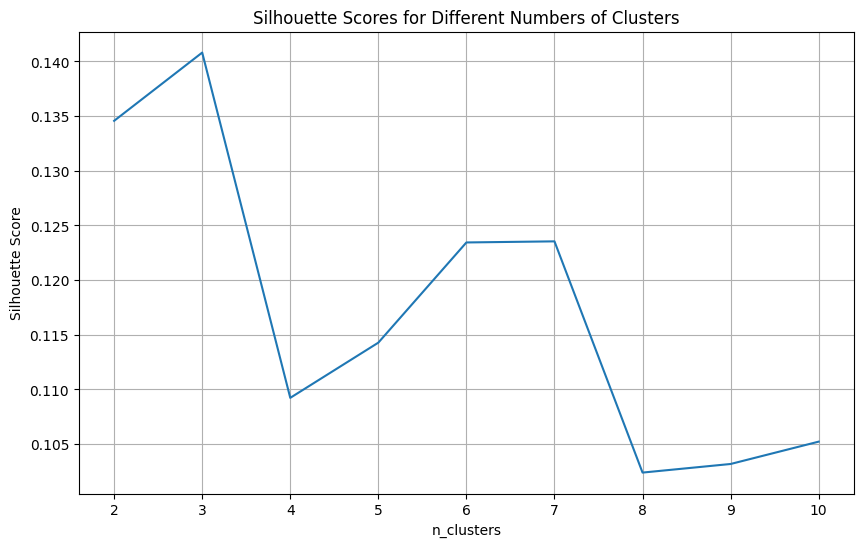

In [ ]:
from sklearn.metrics import silhouette_score

K_range = range(2,11)

silhouette_scores = []

for K in K_range:
    kmeans2 = KMeans(n_clusters=K, random_state=0)
    kmeans2.fit(x2)
    score = silhouette_score(x2, kmeans2.labels_)
    silhouette_scores.append(score)

print(silhouette_scores)

fig = plt.figure(figsize=(10,6))
plt.plot(K_range, silhouette_scores)
plt.xlabel("n_clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.grid(True)
plt.show()

*Comment:* For digits data, the best K seems to be by the two methods K=3, but the silhouette score is not so much higher than others than expected. Because there are suppose to be three different groups of digits (1,7,8).

##Temperature dataset

1. *Look at the name of the cities in each clusters. Do the clustering make sens?*

In [ ]:
# Print the cities in each cluster
for i in range(3):
    cities_in_cluster = np.array(villes)[clusters1 == i]
    print(f"Cluster {i + 1}: {cities_in_cluster}")


Cluster 1: ['Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Paris' 'Strasbourg' 'Vichy']
Cluster 2: ['Brest' 'Nantes' 'Rennes']
Cluster 3: ['Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse']


*Comment:*

2. *Plot the cities with a scatterplot using their geographical position and using the estimated class as color. Do the K-means clustering on temperature recover a geographical similarity between cities?
Why?*

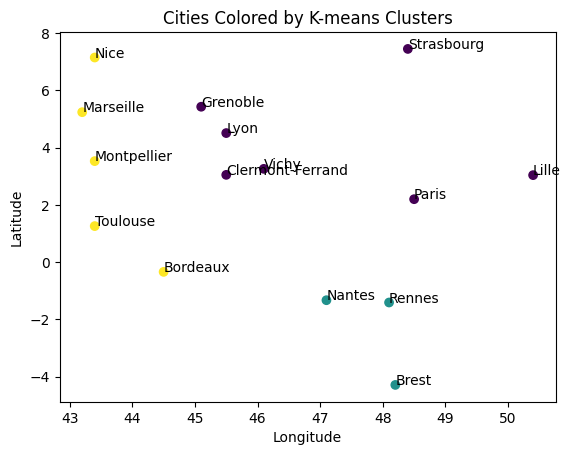

In [ ]:
# Plot cities with cluster colors
plt.scatter(temperature_data["data"][:, 12], temperature_data["data"][:, 13], c=clusters1, cmap='viridis')
for i, ville in enumerate(villes):
    plt.text(temperature_data["data"][i, 12], temperature_data["data"][i, 13], ville)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cities Colored by K-means Clusters")
plt.show()



*Comment:* It seems that Kmeans clustering on temperature recover a geographical similarity between cities. Indeed, we can distinguish geographically the three clusters: the "Bretagne" cluster, the South cluster and the "Center-North" cluster.

Normally, it should depend on how close temperature correlates with geography. Therefore the temperature is of course correlated to the geographical positions of cities.

##Digits dataset

1. *Does the clusters resemble a true image from the dataset ? Could you tell if a cluster centroid is a true image. Why ?*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


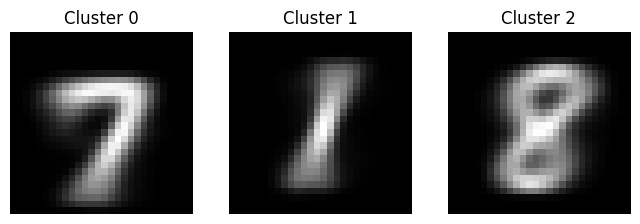

In [ ]:
from sklearn import metrics

# Examine whether the clusters resemble true images from the dataset.
# Determine if you can identify cluster centroids as actual images and explain why or why not.
def plot_cluster_centroids(cluster_centers, num_clusters):
    plt.figure(figsize=(8, 3))
    for i in range(num_clusters):
        plt.subplot(1, num_clusters, i + 1)
        plt.imshow(cluster_centers[i].reshape(28, 28), cmap='gray')
        plt.title(f'Cluster {i}')
        plt.axis('off')
    plt.show()

# Perform K-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(x2)
cluster_centers = kmeans.cluster_centers_

plot_cluster_centroids(cluster_centers, 3)



*Comment:* The clusters obtained by K-means may or may not resemble true images from the dataset. In this example, the clusters resemble to three distinct digits: 1, 7 and 8.

It depends on how well K-means was able to capture the underlying patterns in the data. Each cluster centroid represents the "average" of the data points assigned to that cluster.

If the dataset has distinct patterns for different digits, then the cluster centroids may resemble true images.

2. *Plot the predicted labels (as a signal). Since the samples are ordered by class in the dataset, a clustering respecting the true class should be piecewise constant. Is that the case?*

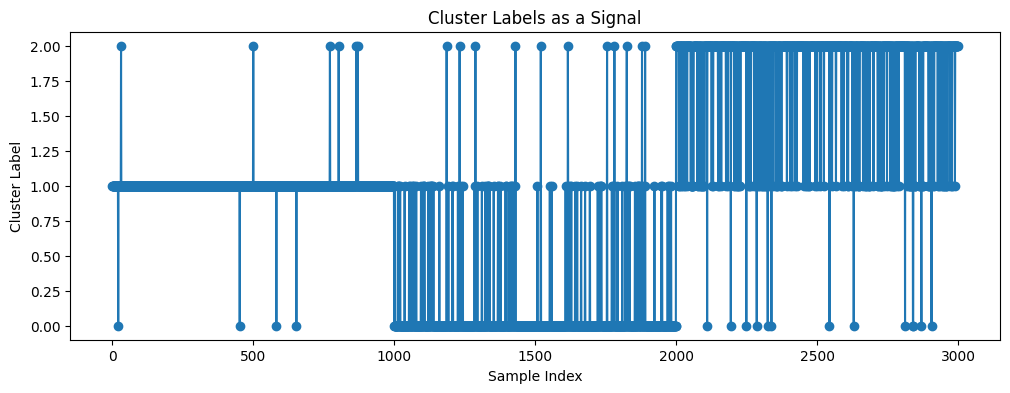

In [ ]:
# Plot predicted labels as a signal
plt.figure(figsize=(12, 4))
plt.plot(clusters2, marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Cluster Label")
plt.title("Cluster Labels as a Signal")
plt.show()



*Comment:* The clustering is not perfectly piecewise constant. However, the 1's seems quite correctly predicted ([0,1000]). But on [1000,2000] and [2000,3000], there is each time two lines. We can explain that by the fact that 7's shapes can be close to the 1's ones. But it is quite surprising for 8's digits.

3. *Compute the quality of the clustering using the ground truth labels (sklearn.metric.rand_score, sklearn.metric.adjusted_rand_score).*

In [ ]:
# Calculate the quality of the clustering using metrics like sklearn.metrics.rand_score and sklearn.metrics.adjusted_rand_score.
rand_score = metrics.rand_score(y2, cluster_labels)
adjusted_rand_score = metrics.adjusted_rand_score(y2, cluster_labels)

print(f"Rand Score: {rand_score}")
print(f"Adjusted Rand Score: {adjusted_rand_score}")


Rand Score: 0.8815562965432923
Adjusted Rand Score: 0.7353304173178205


4. *See the effect of the parameter K on the clustering score. What is the K that leads to the best score?
Why?*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best K: 3 (Rand Score: 0.8815562965432923)


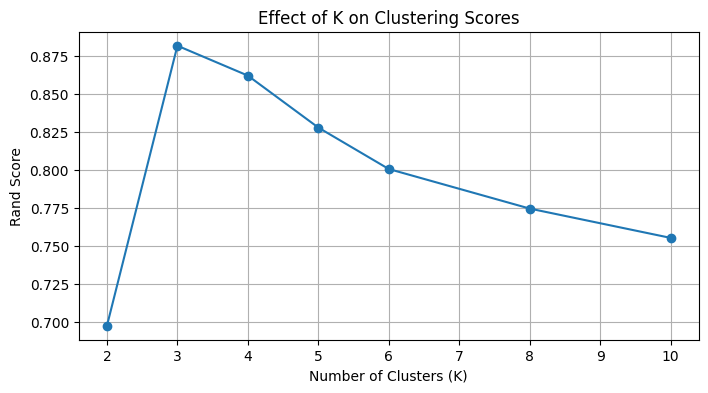

In [ ]:
# Experiment with different values of K and observe their effects on the clustering score.
k_values = [2, 3, 4, 5, 6, 8, 10]  # You can modify this list
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(x2)
    rand_score = metrics.rand_score(y2, cluster_labels)
    scores.append(rand_score)

# Identify the value of K that leads to the best score and provide an explanation.
best_k = k_values[np.argmax(scores)]
print(f"Best K: {best_k} (Rand Score: {max(scores)})")

# Plot the effect of different K values on clustering scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, scores, marker='o')
plt.title('Effect of K on Clustering Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Rand Score')
plt.grid(True)
plt.show()

*Comment:* We repeat the clustering and quality evaluation steps for different values of K to find the K that leads to the best score. The K with the highest adjusted Rand score might be a good choice.

Thus the highest clustering score is obtained with K=3, which is also the obvious number of recognizable different digits in the dataset.



#Density estimation

1. *Estimate a GMM density on the data with K = 2 for temperature and K = 3 for digits (sklearn.
mixture.GaussianMixture). Due to the relatively high dimensional data and small number of samples
we will estimate GMM with diagonal covariances (covariance_type=’diag’)*

In [ ]:
from sklearn.mixture import GaussianMixture

# Define K for temperature and digits datasets
K_temp = 2
K_digits = 3

# Create and fit GMM for temperature dataset
gmm_temp = GaussianMixture(n_components=K_temp, covariance_type='diag', random_state=0)
gmm_temp.fit(x1)

# Create and fit GMM for digits dataset
gmm_digits = GaussianMixture(n_components=K_digits, covariance_type='diag', random_state=0)
gmm_digits.fit(x2)


GaussianMixture(covariance_type='diag', n_components=3, random_state=0)

2. *Plot the centers of the Gaussian distributions in the mixture and interpret them.*

**Temperature Data**

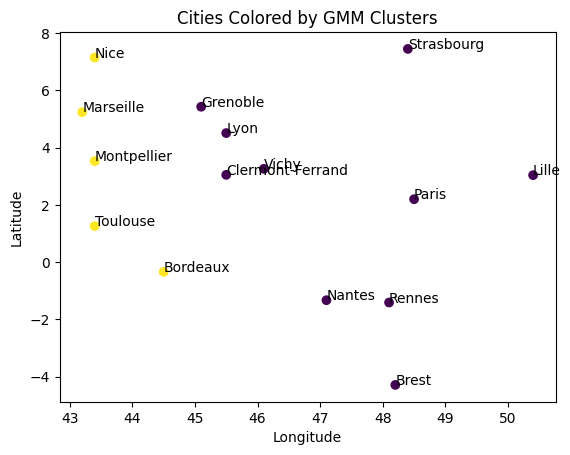

In [ ]:
# Predict the cluster for each data point
clusters_gmm = gmm_temp.predict(x1)

# Plot cities with cluster colors
plt.scatter(temperature_data["data"][:, 12], temperature_data["data"][:, 13], c=clusters_gmm, cmap='viridis')
for i, ville in enumerate(villes):
    plt.text(temperature_data["data"][i, 12], temperature_data["data"][i, 13], ville)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cities Colored by GMM Clusters")
plt.show()


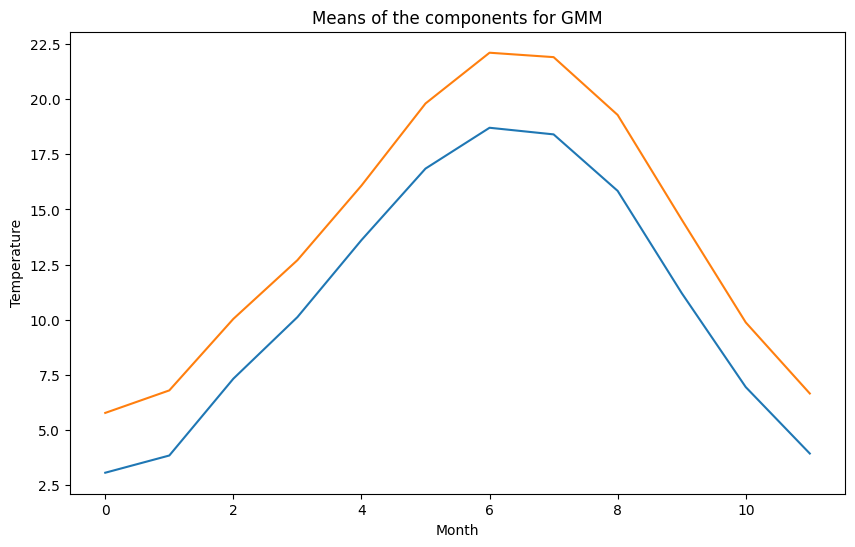

In [ ]:
fig = plt.figure(figsize=(10,6))
for i in range(2):
  plt.plot(gmm_temp.means_[i])
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Means of the components for GMM")
plt.show()

*Comment:* The means of the clusters are not identical to the ones of the KMeans (because K_temp=2). Indeed, the orange signal corresponds to the southern cities means, the blue one for the rest of the cities

**Digits Data**

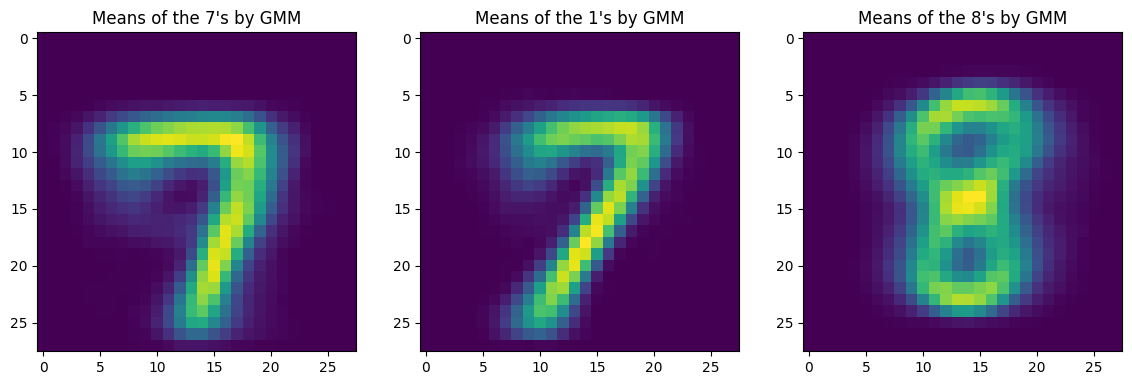

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,6))
for i, digit in enumerate([7,1,8]):
  ax[i].imshow(gmm_digits.means_[i].reshape(28,28))
  ax[i].set_title("""Means of the {}'s by GMM""".format(digit))
plt.show()

*Comment:* All the centroids are easily recognizable, except for 1 and 7 similarities. We can notice that the 7's centroid doesn't have the horizontal bar, which can provoke misclassifications of 7's digits.

3. *Change the value of K and repeat the two previous steps. What are good values in your opinion and why? Change the shape of the covariance, how well are they estimated on both datasets?*

Best K for temperature dataset: 2
Best covariance type for temperature dataset: full
Best K for digits dataset: 3
Best covariance type for digits dataset: full


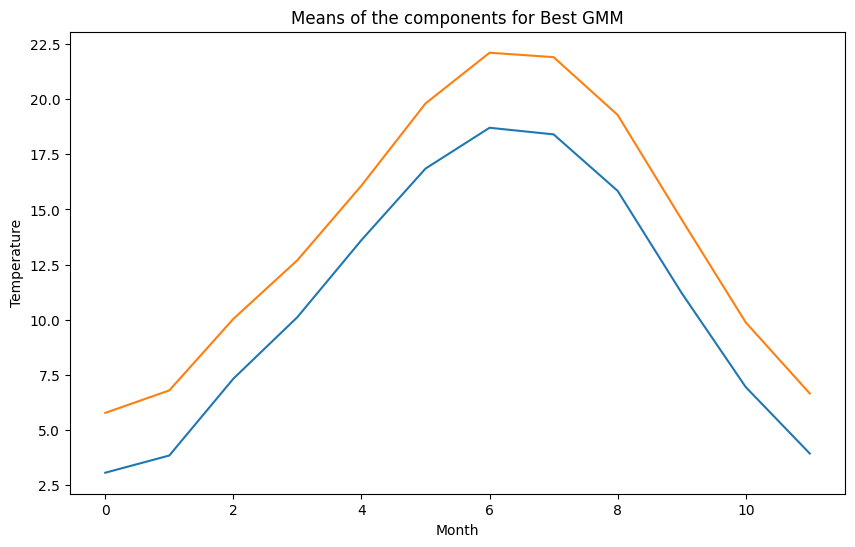

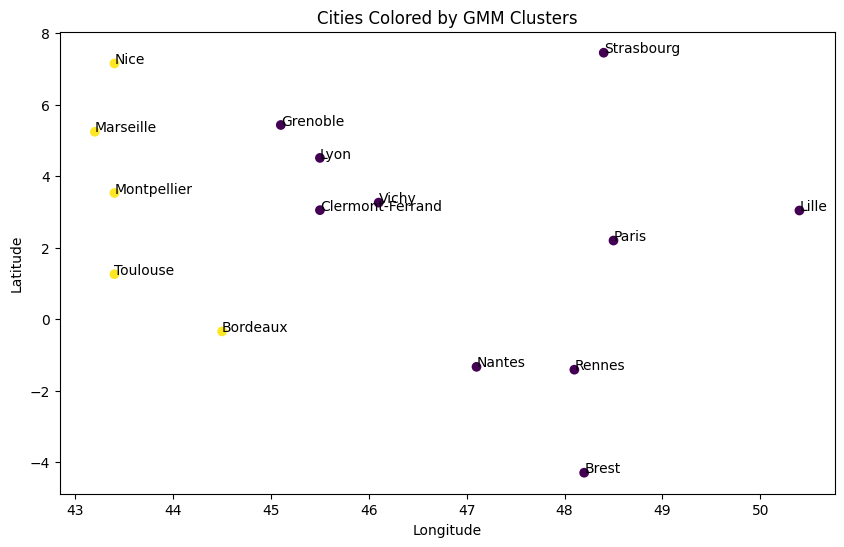

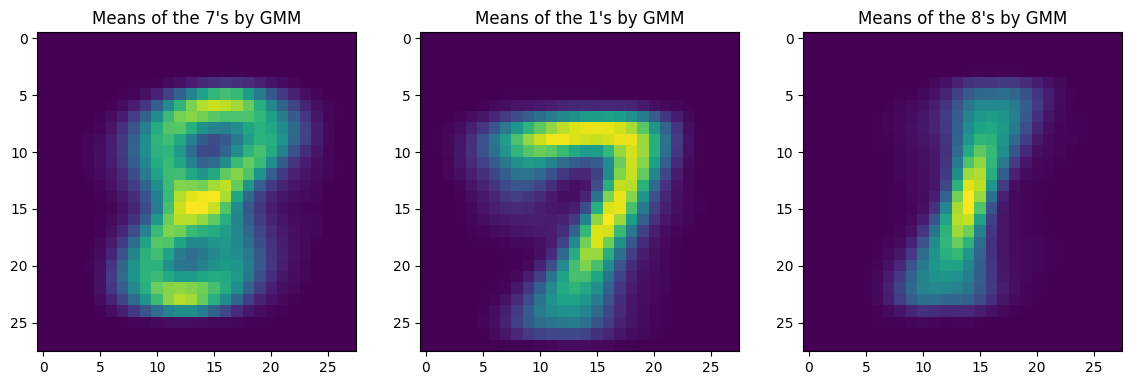

In [ ]:
from sklearn.metrics import silhouette_score

datasets = [x1, x2]
dataset_names = ["temperature", "digits"]

# Define the range of K values and covariance types
K_values = range(2, 7)
cov_types = ['full', 'tied', 'diag', 'spherical']

best_models = {}

for data, name in zip(datasets, dataset_names):
    best_score = -np.inf
    best_K = None
    best_cov_type = None

    # Try each combination of K and covariance type
    for K in K_values:
        for cov_type in cov_types:
            # Create and fit a GMM
            gmm = GaussianMixture(n_components=K, covariance_type=cov_type, random_state=0)
            gmm.fit(data)

            # Compute silhouette score as a measure of goodness of fit
            labels = gmm.predict(data)
            score = silhouette_score(data, labels)

            # If this score is better than the current best, update the best parameters
            if score > best_score:
                best_score = score
                best_K = K
                best_cov_type = cov_type
                best_models[name] = gmm

    print(f"Best K for {name} dataset: {best_K}")
    print(f"Best covariance type for {name} dataset: {best_cov_type}")

# Plot the means of the components for the temperature GMM
fig = plt.figure(figsize=(10,6))
for i in range(2):
    plt.plot(best_models['temperature'].means_[i])
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Means of the components for Best GMM")
plt.show()

# Plot cities with cluster colors for temperature data
clusters_gmm_temp = best_models['temperature'].predict(x1)
plt.figure(figsize=(10, 6))
plt.scatter(temperature_data["data"][:, 12], temperature_data["data"][:, 13], c=clusters_gmm_temp, cmap='viridis')
for i, ville in enumerate(villes):
    plt.text(temperature_data["data"][i, 12], temperature_data["data"][i, 13], ville)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cities Colored by GMM Clusters")
plt.show()

# Plot means of the digits by GMM for digits data
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,6))
for i, digit in enumerate([8,7,1]):
  ax[i].imshow(best_models['digits'].means_[i].reshape(28,28))
  ax[i].set_title("""Means of the {}'s by GMM""".format(digit))
plt.show()

*Comment:* We just determine the optimal K and covariance type for each dataset. We can observe that instead of the used 'diag', 'full' have a better silhouette score.

The optimal K is quite coherent, because for example for digits dataset, we have seen three quite distinct group of digits (1,7,8).

However, we need to be careful not to overfit by choosing a too complex model (large K or full covariance type). But here the full covariance seems to be optimal.

We could had use methods like cross-validation or information criteria (AIC, BIC) to choose an optimal model.

4. *Compute the log probability of the samples for the estimated density (model.score_samples(x)).
Recover the samples with the smallest score (probability) and plot them. They can be considered as outliers for the distribution (least probable samples). Wan you see why?*

**Temperature Data**

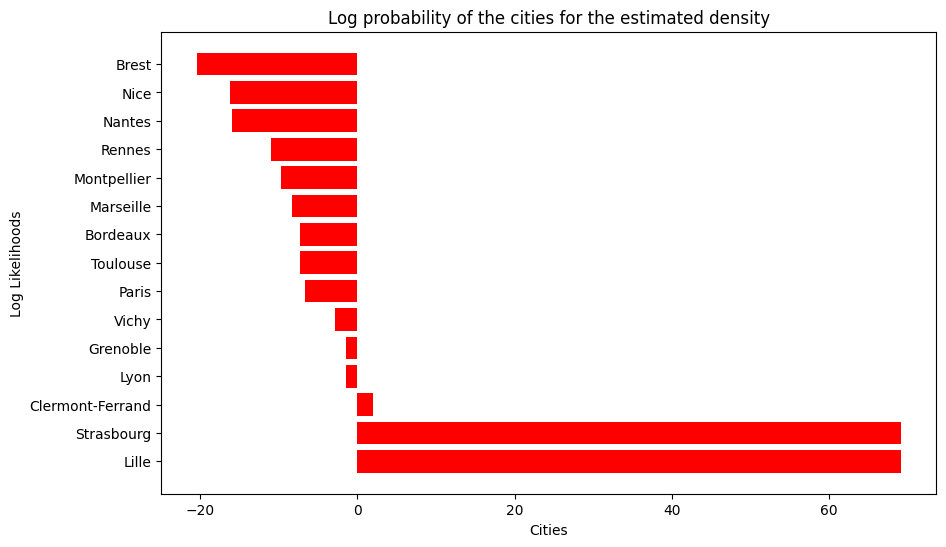

In [ ]:
log_likelihood_temp = gmm_temp.score_samples(x1)
sort_i_temp = np.flip(log_likelihood_temp.argsort())

fig = plt.figure(figsize=(10,6))
plt.barh(villes[sort_i_temp], log_likelihood_temp[sort_i_temp], color="red")
plt.xlabel("Cities")
plt.ylabel("Log Likelihoods")
plt.title("Log probability of the cities for the estimated density")
plt.show()

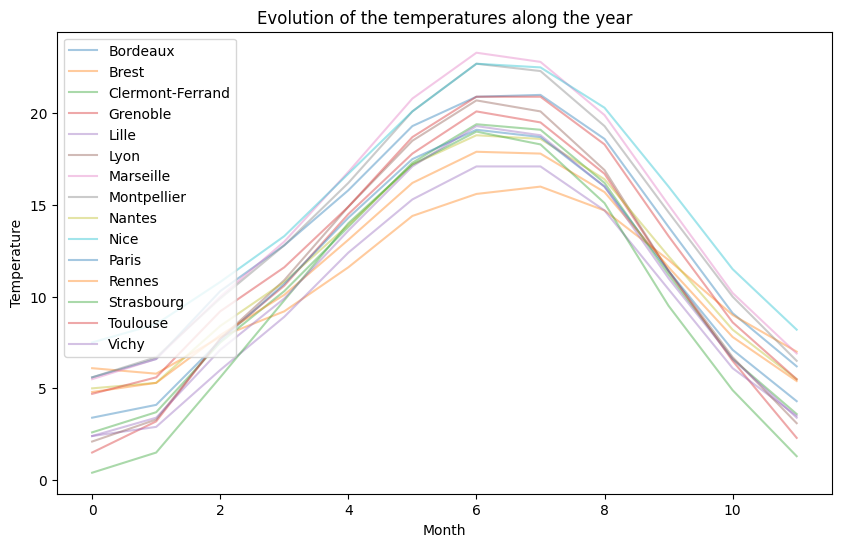

In [ ]:
fig = plt.figure(figsize=(10,6))
for i, ville in enumerate(villes):
  plt.plot(range(12), x1[i,:], label="{}".format(ville), alpha=0.4)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Evolution of the temperatures along the year")
plt.legend(loc='upper left')
plt.show()

*Comment:* We can see that Brest is the most likely to be an outlier. Indeed, we can also see in the following graph that Brest is quite isolated, by being by far the lowest variations of temperature along the year.

**Digits Data**

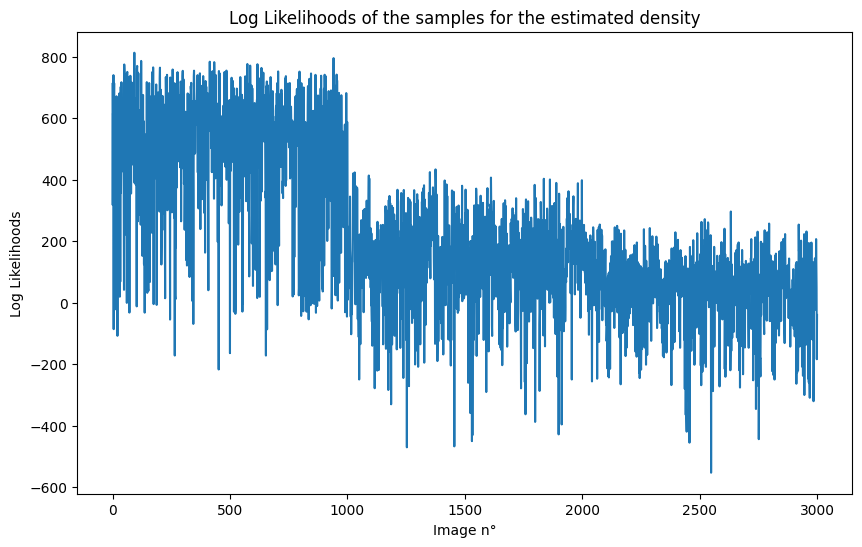

In [ ]:
log_likelihood_digits = gmm_digits.score_samples(x2)

fig = plt.figure(figsize=(10,6))
plt.plot(log_likelihood_digits)
plt.xlabel("Image n°")
plt.ylabel("Log Likelihoods")
plt.title("Log Likelihoods of the samples for the estimated density")
plt.show()

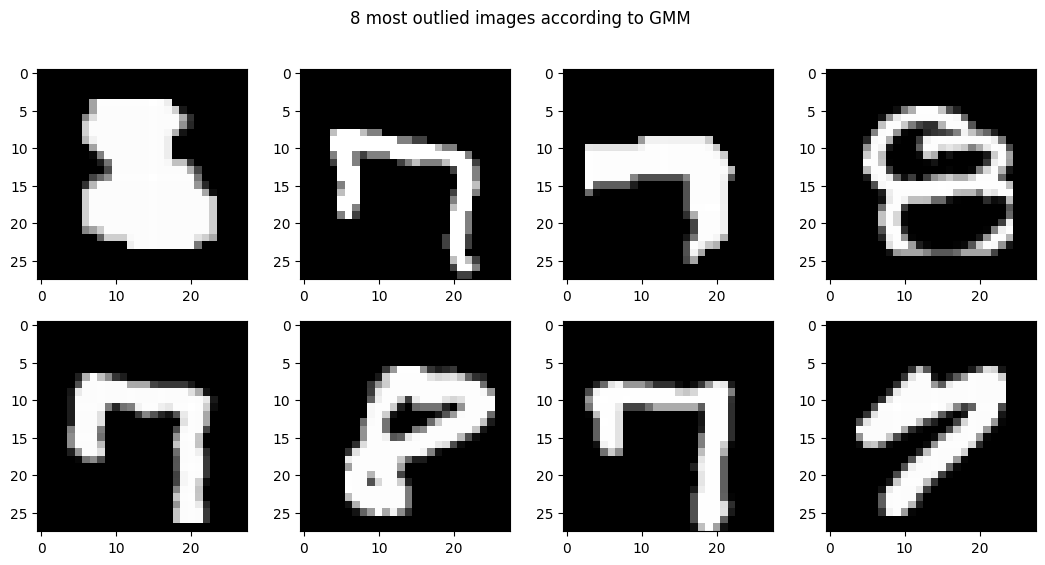

In [ ]:
sort_i_digits = np.argsort(log_likelihood_digits)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(13,6))
for i, n in enumerate(sort_i_digits[:8]):
  plt.subplot(2, 4, i+1)
  plt.imshow(x2[n,:].reshape(28,28), cmap='gray')
plt.suptitle("8 most outlied images according to GMM")
plt.show()

*Comment:* We can recognize the 8's and the 7's digits, but they are obviously not looking like the centers of the Gaussian distributions for digits dataset.

5. *Digits dataset : Estimate the labels of the samples (model.predict) and compute the clustering rand score. Is it better than Kmeans? Why?*

In [ ]:

# Compute the clustering rand score for GMM
from sklearn.metrics import adjusted_rand_score

predicted_labels_digits = gmm_digits.predict(x2)
rand_score_gmm = metrics.adjusted_rand_score(y2, predicted_labels_digits)
print(f"Adjusted Rand Score for GMM: {rand_score_gmm}")

Adjusted Rand Score for GMM: 0.45496118745312925


*Comment:* We found a lower adjusted rand score for the GMM compared to KMeans, it means that the GMM clustering is less similar to the true labels than KMeans clustering.

There could be several reasons why GMM might have a lower ARS than KMeans. For example, the number of clusters, but here K=3 in both cases. But here i think it should possibly that the assumption that KMeans assumes that clusters are convex and isotropic, which means they have a spherical shape.


6. *(Bonus) generate samples from the distribution (model.samples) and plot them. Could you differentiate them from real data?*

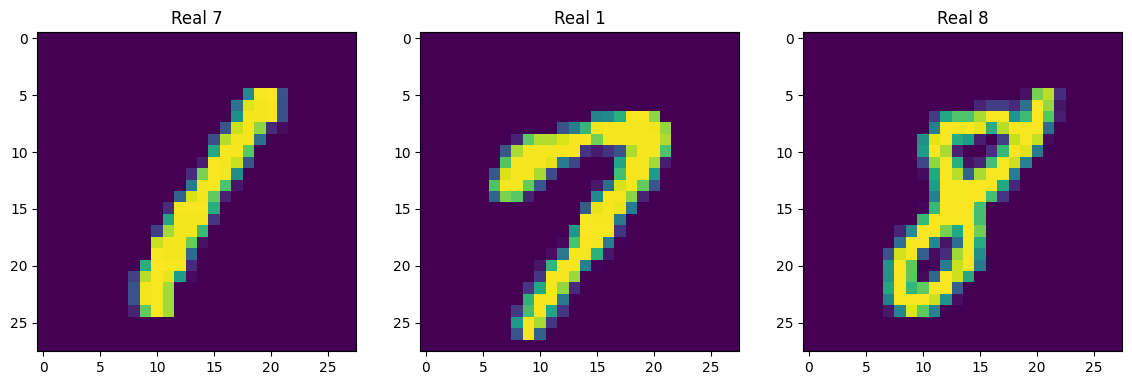

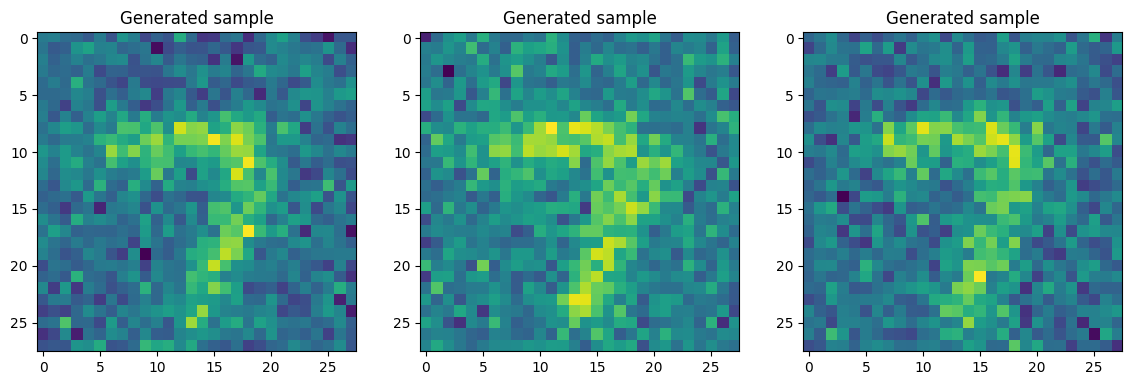

In [ ]:
n_samples = 1000

# Generate samples
samples, _ = gmm_digits.sample(n_samples)

# Plot real data
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,6))
for i, digit in enumerate([7,1,8]):
  ax[i].imshow(x2[i*1000].reshape(28,28))
  ax[i].set_title(f"Real {digit}")

# Plot generated samples
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,6))
for i in range(3):
  ax[i].imshow(samples[i].reshape(28,28))
  ax[i].set_title("Generated sample")
plt.show()

*Comment:* We can obviously differentiate tham from real data, because there are too blurried to be real data.



#Dimensionality reduction

## Linear Projection: PCA

1. *Compute the covariance matrix of the data and plot it as an image (np.cov(x.T)). Interpret the
structure of the covariance matrix using your knowledge of the data (relations between features)*

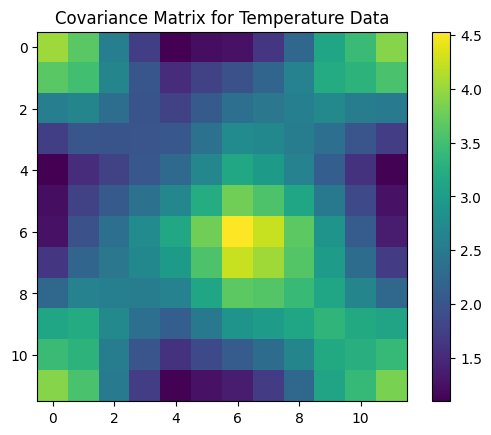

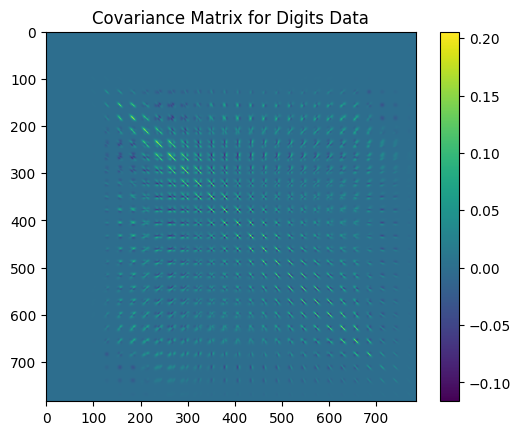

In [ ]:
# Compute the covariance matrix for temperature data
cov_matrix_temp = np.cov(x1.T)

# Plot the covariance matrix as an image
plt.imshow(cov_matrix_temp, cmap='viridis')
plt.title("Covariance Matrix for Temperature Data")
plt.colorbar()
plt.show()

# Repeat for digits data
cov_matrix_digits = np.cov(x2.T)
plt.imshow(cov_matrix_digits, cmap='viridis')
plt.title("Covariance Matrix for Digits Data")
plt.colorbar()
plt.show()


*Comment:* For temperature data, the extremes features such as 0 and 12 are the less correlated to others. The square in the middle corresponds to positive correlations among the summer months.

For digits data, it is more difficult to make conclusions, but each image seems more correlated to their neighbors than to the others.

2. *Compute the PCA (keeping all dimensions with n_components=None) for the data and recover the
explained variance ratio (stored in model.explained_variance_ratio_) that is the proportion of
energy in each principal direction stored. Plot it and discuss the quantity of information preserved
when projecting on p = 2 dimensions*

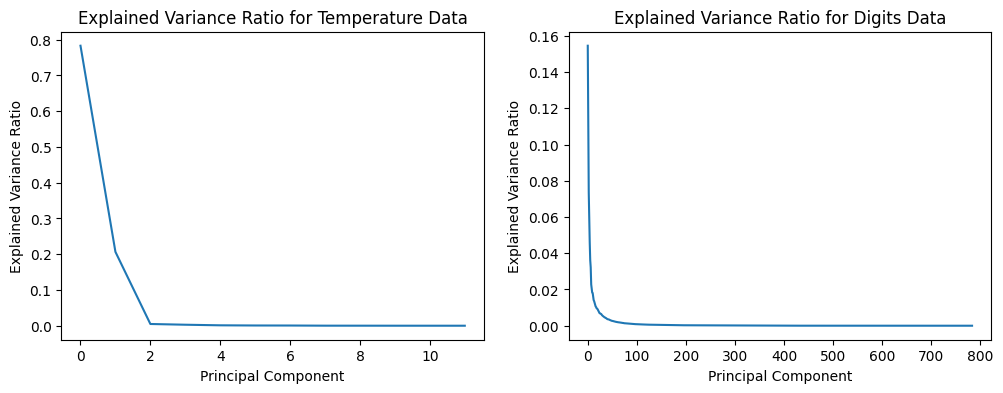

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA for temperature data
pca_temp = PCA(n_components=None)
pca_temp.fit(x1)

# Perform PCA for digits data
pca_digits = PCA(n_components=None)
pca_digits.fit(x2)

# Plot explained variance ratio
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(pca_temp.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio for Temperature Data")

plt.subplot(1, 2, 2)
plt.plot(pca_digits.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio for Digits Data")
plt.show()


*Comment:* For temperature data, keeping only the first component enables to preserve only 80% of the total variation of the data. Then to have at least 95% of explained variance, we should have 2 components.

The reasoning is respectively the same for digits data.

3. *Project the samples in p = 2 dimensions and plot the projected samples (model.transform(x)). For
temperature data also plot the name of the city close to the sample (pl.text(x,y,’text’)) for a
better interpretation. For the digits dataset, color the samples with their class in the scatterplot.
Interpret the relations between the samples, what information is preserved and is it correlated to what
your know about the samples (geographic position or true class) ?*

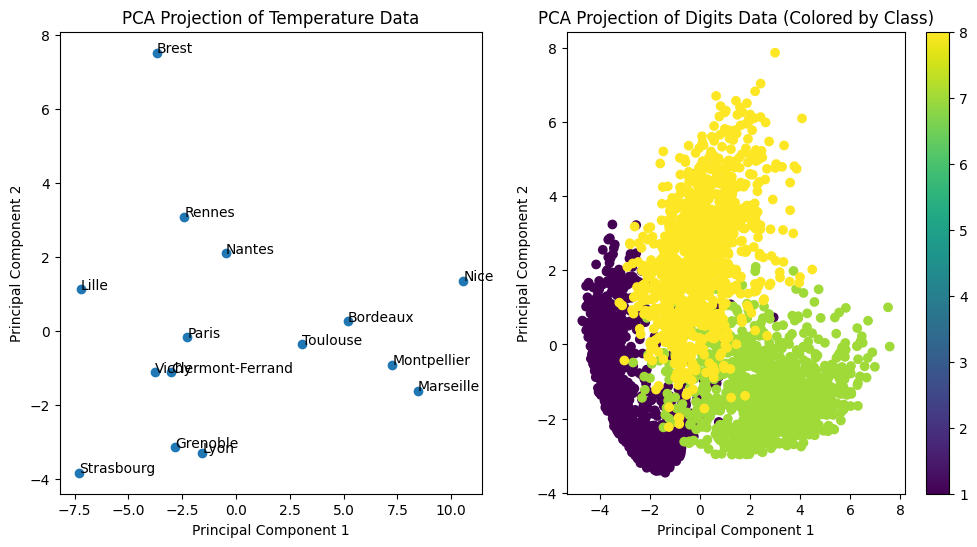

In [ ]:
# Project samples to 2 dimensions for temperature data
projected_samples_temp = pca_temp.transform(x1)

# Project samples to 2 dimensions for digits data
projected_samples_digits = pca_digits.transform(x2)

# Plot the projected samples
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(projected_samples_temp[:, 0], projected_samples_temp[:, 1])
for i, ville in enumerate(villes):
    plt.text(projected_samples_temp[i, 0], projected_samples_temp[i, 1], ville)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Temperature Data")

plt.subplot(1, 2, 2)
plt.scatter(projected_samples_digits[:, 0], projected_samples_digits[:, 1], c=y2, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Digits Data (Colored by Class)")
plt.colorbar()
plt.show()


*Comment:* For temperature data, PC1 and PC2 seems connected to their geographical position, with PC2 connected to West-East axis and PC1 North-South axis.

For digits data, we can recognize three groups: the blue one for the 1's digits, the yellow one for the 8's digits and the green one for the 7's digits. Therefore PC1 seems connected to the 7's mean digit and PC2 to the 8's one.

4. *Get the the two first principal directions (model.components_) from the model. Plot them and
interpret them. What is the impact of moving along those direction in the original space?*

**Temperature**

First principal component

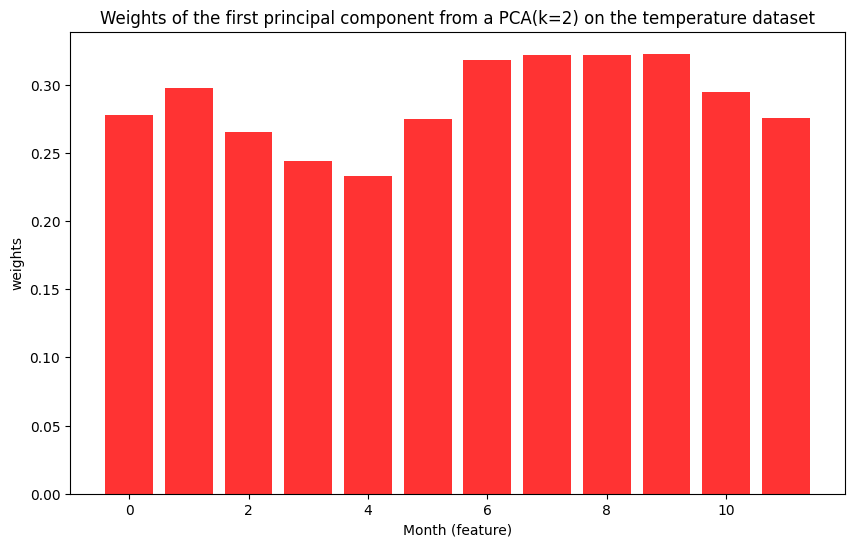

In [ ]:
components_temp = pca_temp.components_

fig = plt.figure(figsize=(10, 6))
plt.bar(range(12),components_temp[0,:], color="red", alpha=0.8)
plt.xlabel("Month (feature)")
plt.ylabel("weights")
plt.title("Weights of the first principal component from a PCA(k=2) on the temperature dataset")
plt.show()

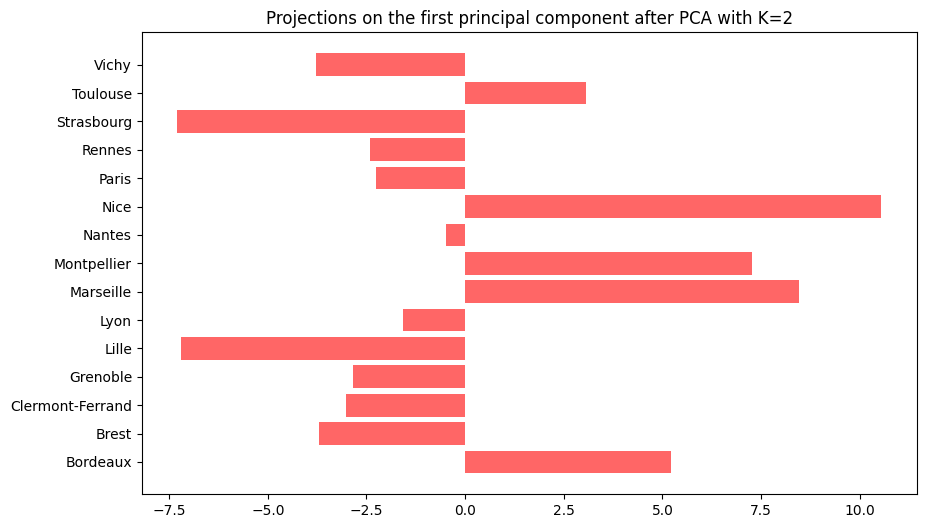

In [ ]:
fig = plt.subplots(figsize=(10,6))

plt.barh(villes,projected_samples_temp[:,0], color="red", alpha=0.6)
plt.title("Projections on the first principal component after PCA with K=2")
plt.show()

Second principal component

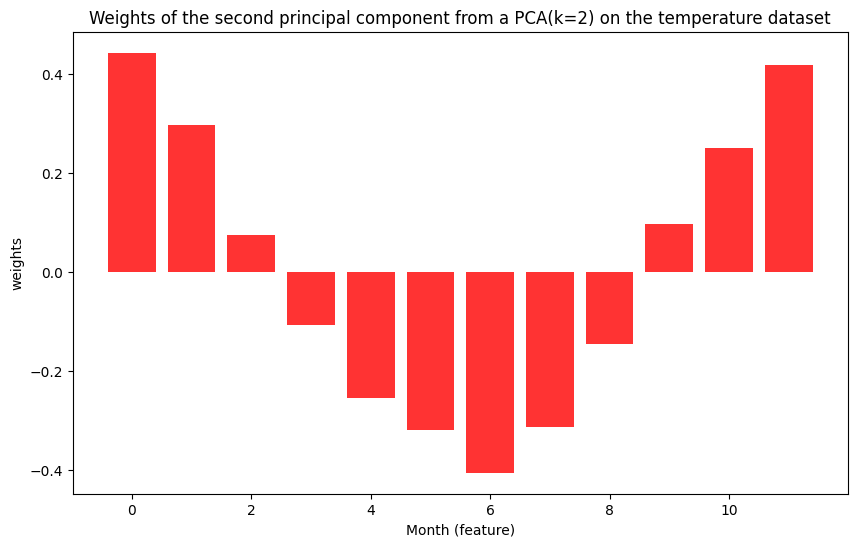

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.bar(range(12), components_temp[1,:], color="red", alpha=0.8)
plt.xlabel("Month (feature)")
plt.ylabel("weights")
plt.title("Weights of the second principal component from a PCA(k=2) on the temperature dataset")
plt.show()

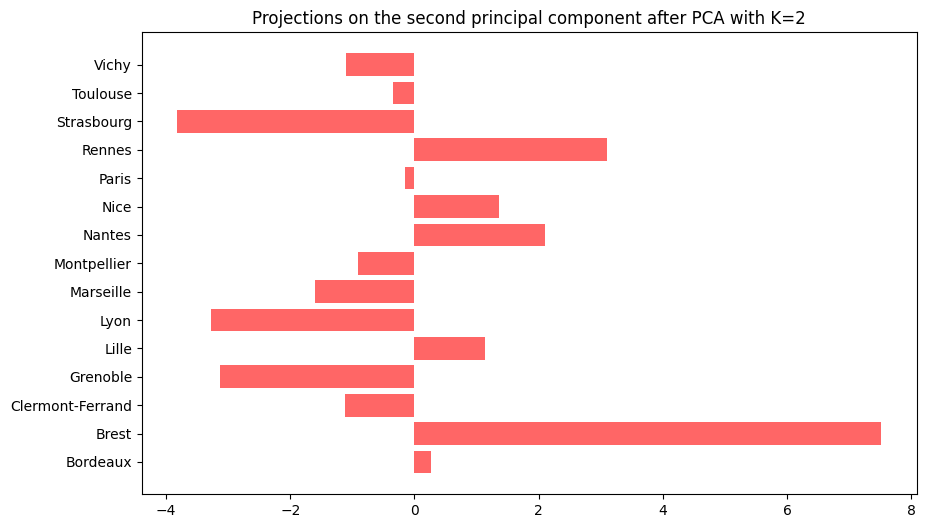

In [ ]:
fig = plt.subplots(figsize=(10,6))

plt.barh(villes,projected_samples_temp[:,1], color="red", alpha=0.6)
plt.title("Projections on the second principal component after PCA with K=2")
plt.show()

*Comment:* As we suppose precedently, the role of the both components is geographical. The first one captures the southern cities and the second one the western cities as Brest.

**Digits**

In [ ]:
components_digits = pca_digits.components_

First principal component

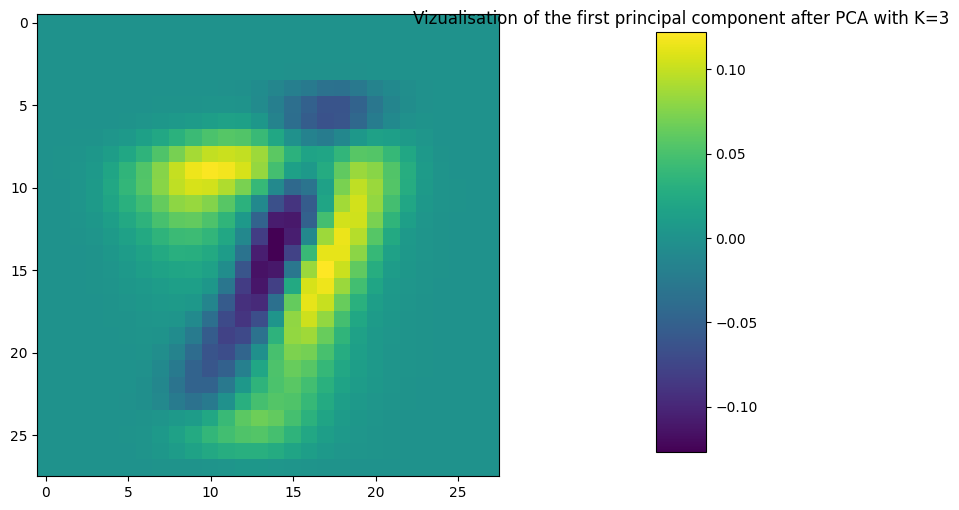

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(components_digits[0].reshape(28,28))
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85,0.15,0.05,0.7])
fig.colorbar(im, cax=cbar_ax)
plt.title("Vizualisation of the first principal component after PCA with K=3")
plt.show()

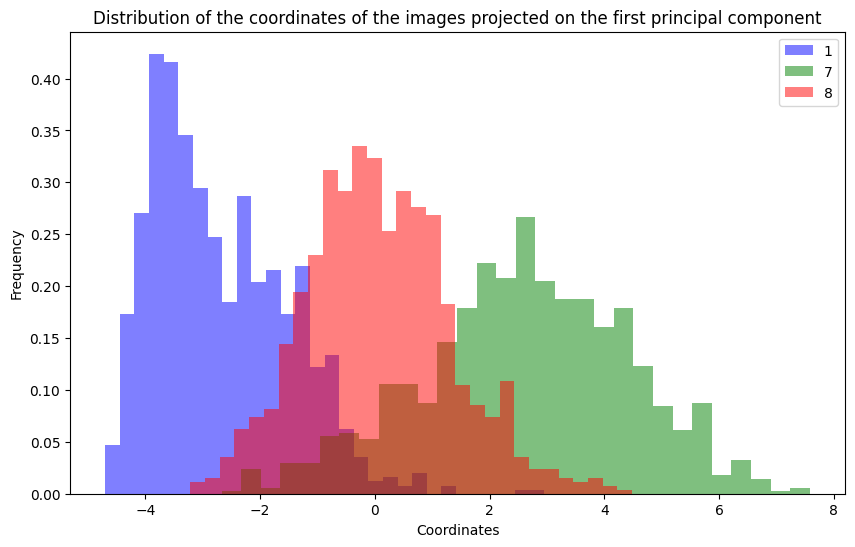

In [ ]:
labels = [1,7,8]
colors = ["blue", "green", 'red']

fig, ax = plt.subplots(figsize=(10,6))

for i, label in enumerate(labels):
    plt.hist(projected_samples_digits[i*1000: (i+1)*1000, 0], color=colors[i], bins=30, label="{}".format(label), alpha=0.5, density=True)
plt.xlabel("Coordinates")
plt.ylabel("Frequency")
plt.title("Distribution of the coordinates of the images projected on the first principal component")
plt.legend()
plt.show()

Second principal component

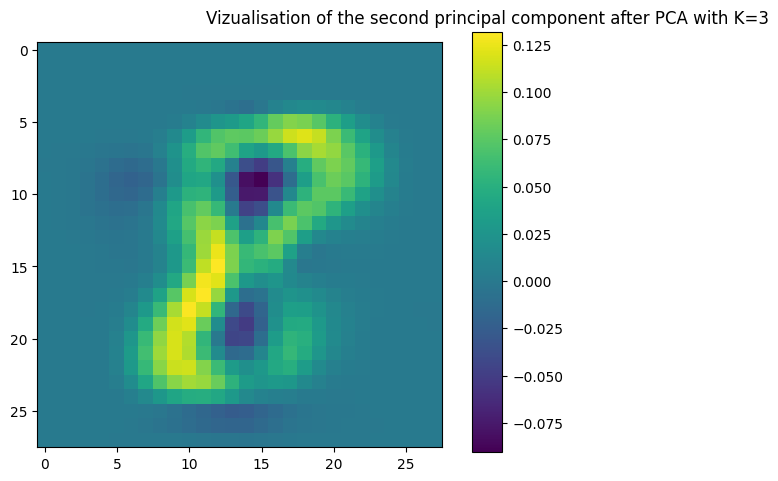

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

im = ax.imshow(components_digits[1].reshape(28,28))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.title("Vizualisation of the second principal component after PCA with K=3")

plt.show()

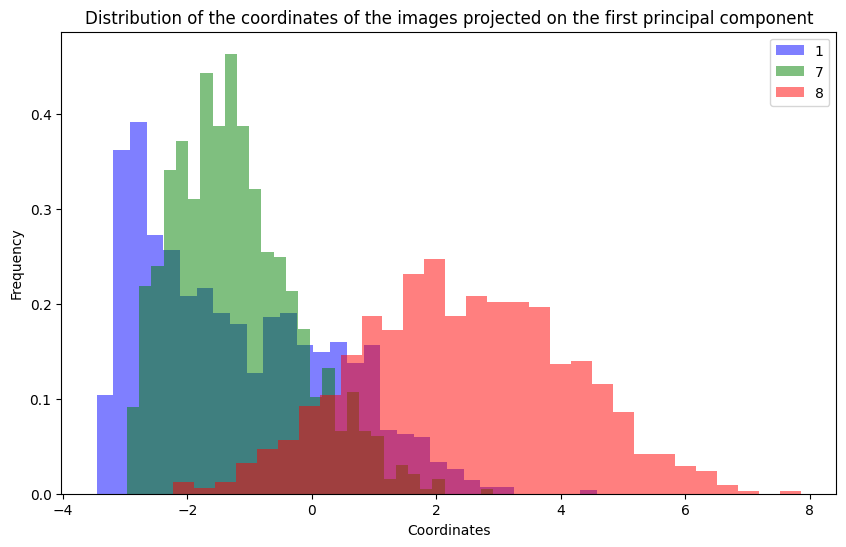

In [ ]:
labels = [1,7,8]
colors = ["blue", "green", 'red']

fig, ax = plt.subplots(figsize=(10,6))

for i, label in enumerate(labels):
    plt.hist(projected_samples_digits[i*1000: (i+1)*1000, 1], color=colors[i], bins=30, label="{}".format(label), alpha=0.5, density=True)
plt.xlabel("Coordinates")
plt.ylabel("Frequency")
plt.title("Distribution of the coordinates of the images projected on the first principal component")
plt.legend()
plt.show()

*Comment:* For the second principal component, the image look like a 8 digit, as we suppose in the precedent question. Then this axis enables to separate the 8's from the other digits. Indeed, the coordiantes of the images from class 8 are positive, whereas others are negative.

For the first principal component, the image looks like a 7's digit on yellow region and looks like a 1's digit on blue region. The distributions from 1's and 7's digits are separated, so this axis might separate these two digits.

5. *Reconstruct the data from the projected samples (model.inverse_transform(xp)) for different subspace
dimension p. For a few samples in the dataset plot, the sample and its reconstruction. Is it still
recognizable? Look at the impact of p on the quality of reconstruction*

**Temperature**

In [ ]:
temp_inverse = pca_temp.inverse_transform(projected_samples_temp)
temp_inverse.shape

(15, 12)

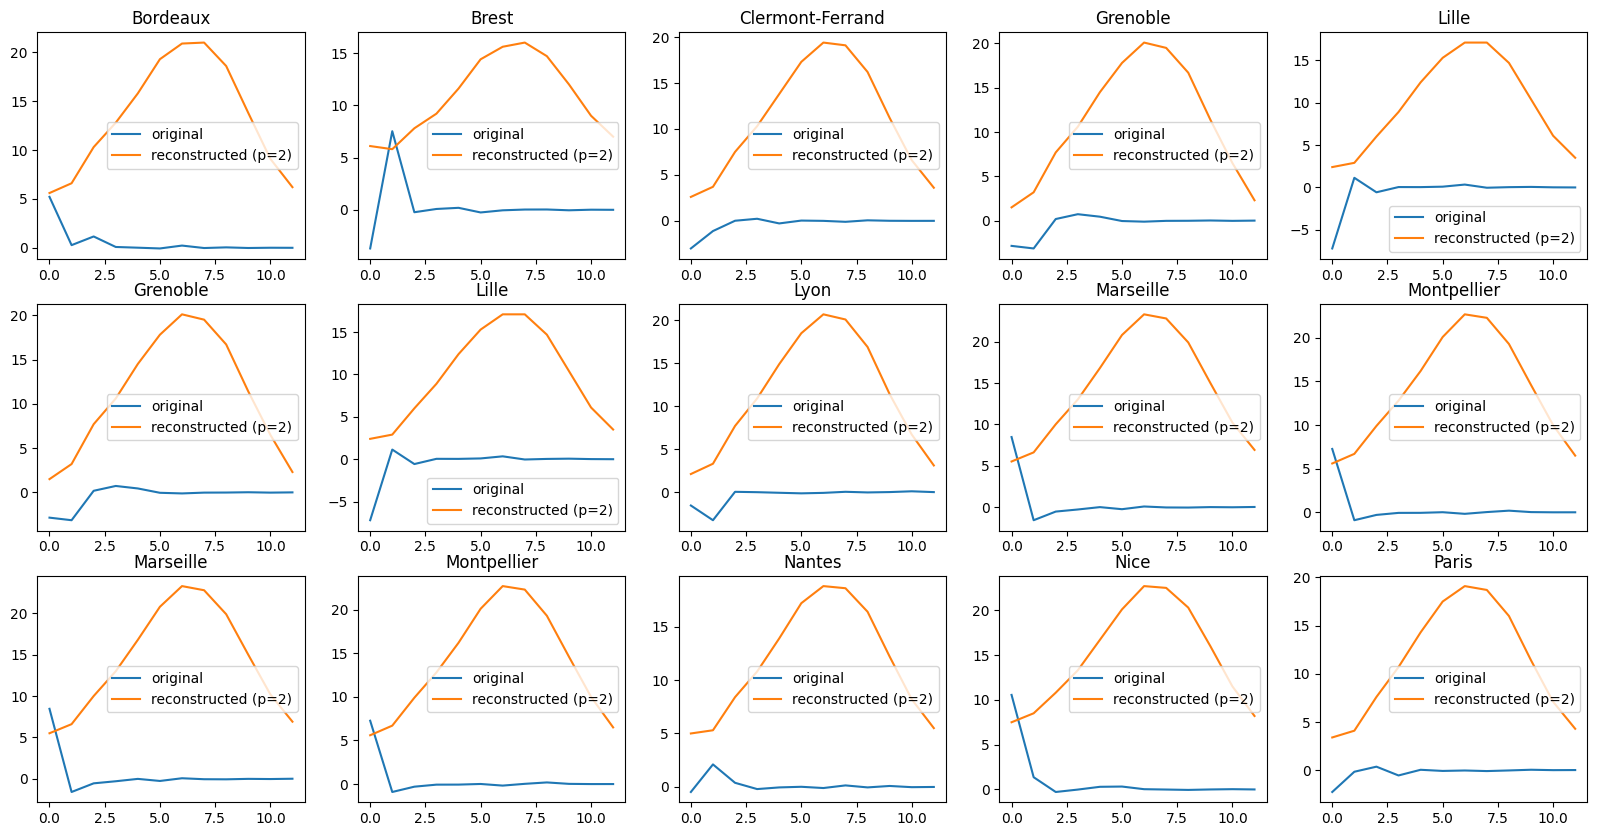

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,10))

for i in range(3):
  for j in range(5):
    ax[i,j].plot(projected_samples_temp[i*3+j], label="original")
    ax[i,j].plot(temp_inverse[i*3+j], label="reconstructed (p=2)")
    ax[i,j].legend()
    ax[i,j].set_title("{}".format(villes[i*3+j]))
plt.show()

**Digits**

In [ ]:
digits_inverse = pca_digits.inverse_transform(projected_samples_digits)
digits_inverse.shape

(3000, 784)

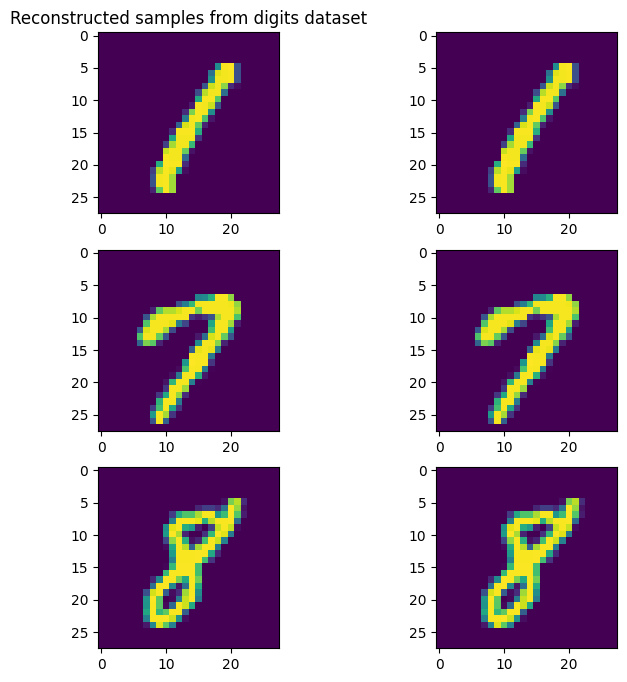

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,8))
for i in range(3):
  ax[i,0].imshow(x2[1000*i].reshape(28,28))
  ax[i,1].imshow(digits_inverse[1000*i].reshape(28,28))
ax[0,0].set_title("Reconstructed samples from digits dataset")
plt.show()

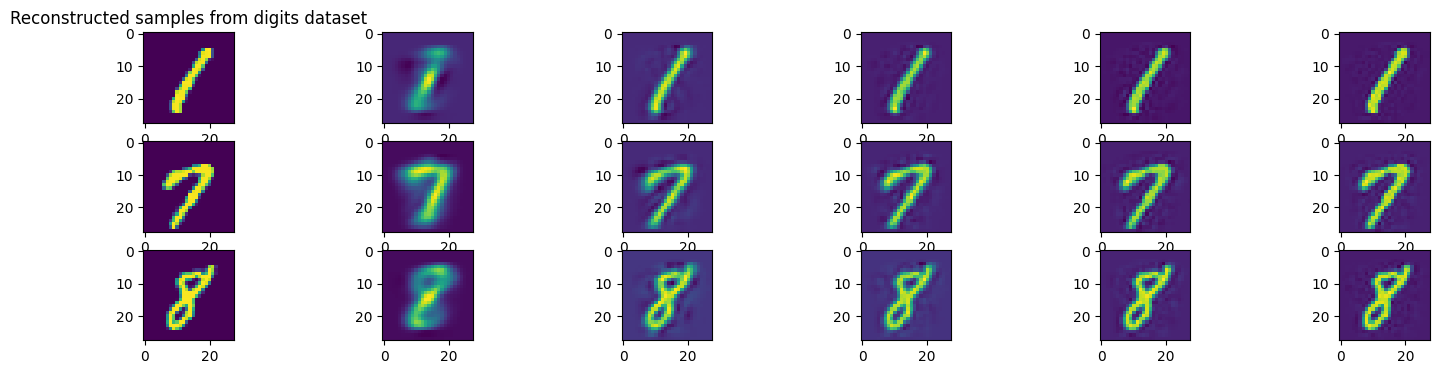

In [ ]:
p_to_test = np.linspace(2,210,5)

fig, ax = plt.subplots(nrows=3, ncols=len(p_to_test)+1, figsize=(18,4))

ax[0,0].imshow(x2[0].reshape(28,28))
ax[1,0].imshow(x2[1000].reshape(28,28))
ax[2,0].imshow(x2[2000].reshape(28,28))

for i,p in enumerate(p_to_test):
    pca_tmp = PCA(n_components=int(p)).fit(x2)
    x_mnist_inv = pca_tmp.inverse_transform(pca_tmp.transform(x2))
    ax[0,i+1].imshow(x_mnist_inv[0].reshape(28,28))
    ax[1,i+1].imshow(x_mnist_inv[1000].reshape(28,28))
    ax[2,i+1].imshow(x_mnist_inv[2000].reshape(28,28))
ax[0,0].set_title("Reconstructed samples from digits dataset")

plt.show()

*Comment:* Initially, the reconstructed samples are quite blurried. But, as p increases, the quality of reconstruction seems to improve, especially in digits example. Smaller values of p lead to more loss of information, resulting in less accurate reconstructions.

6. *(Bonus) Estimate and visualize other linear modeling methods such as NMF that can be used on
positive of the data*

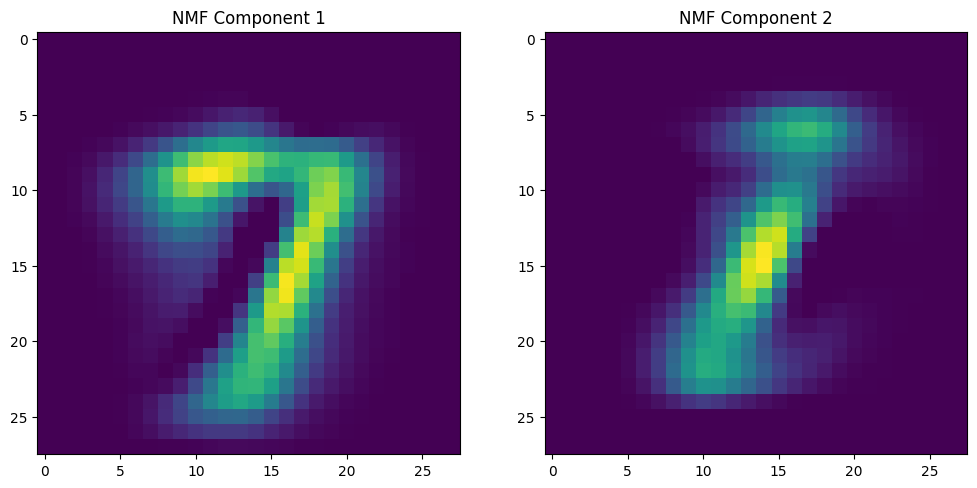

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf_result = nmf.fit_transform(x2)

# Plot the components
plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(nmf.components_[i].reshape(28,28))
    plt.title(f"NMF Component {i+1}")
plt.show()

## Manifold Learning: TSNE

1. *Compute the TSNE embedding of the data for in p = 2 for both datasets (sklearn.manifold.TSNE)*

In [ ]:
from sklearn.manifold import TSNE

# Compute t-SNE embedding for temperature data with a lower perplexity
tsne_temp = TSNE(n_components=2, perplexity=10)
tsne_result_temp = tsne_temp.fit_transform(x1)

# Compute t-SNE embedding for digits data
tsne_digits = TSNE(n_components=2)
tsne_result_digits = tsne_digits.fit_transform(x2)


2. *Project the samples and plot them. For temperature data also plot the name of the city close to
the sample (pl.text(x,y,’text’)). For the digits dataset, color the samples with their class in the
scatterplot*

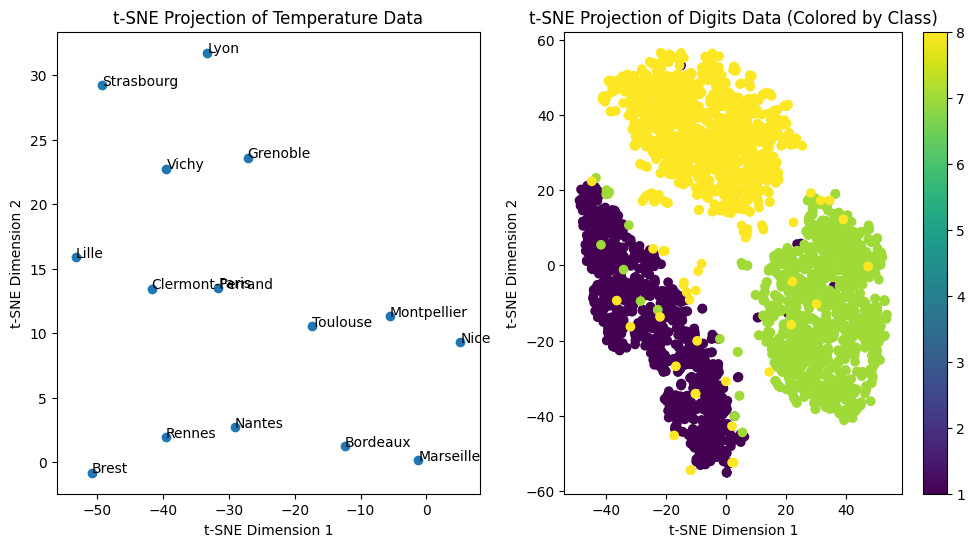

In [ ]:
# Plot t-SNE projections
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(tsne_result_temp[:, 0], tsne_result_temp[:, 1])
for i, ville in enumerate(villes):
    plt.text(tsne_result_temp[i, 0], tsne_result_temp[i, 1], ville)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Projection of Temperature Data")

plt.subplot(1, 2, 2)
plt.scatter(tsne_result_digits[:, 0], tsne_result_digits[:, 1], c=y2, cmap='viridis')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Projection of Digits Data (Colored by Class)")
plt.colorbar()
plt.show()


3. *What is the effect of the perplexity parameter? Does the embedding recover geographical relations for the temperature dataset? Is the embedding more discriminant in 2D for the digits dataset than the ACP?*

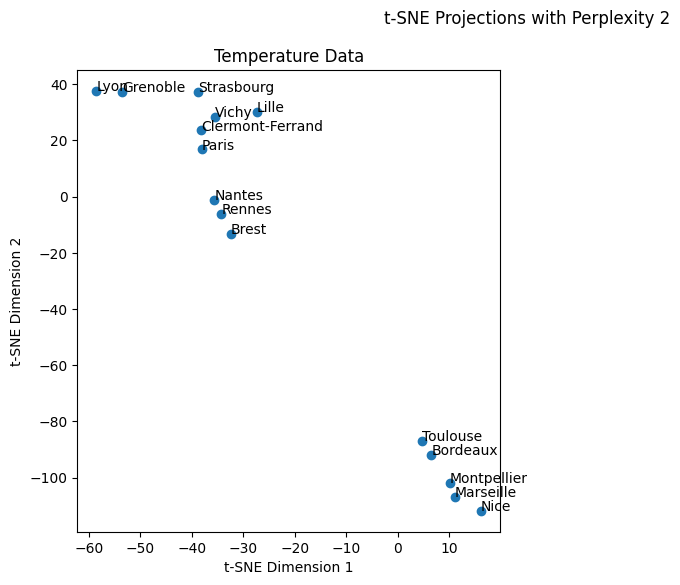

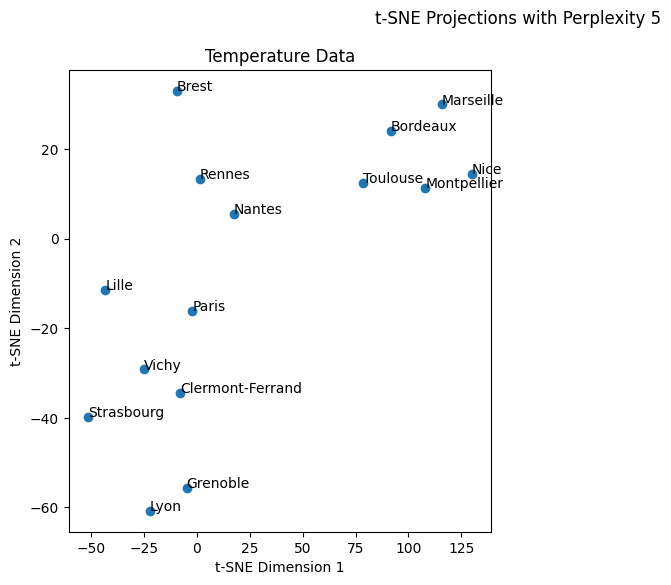

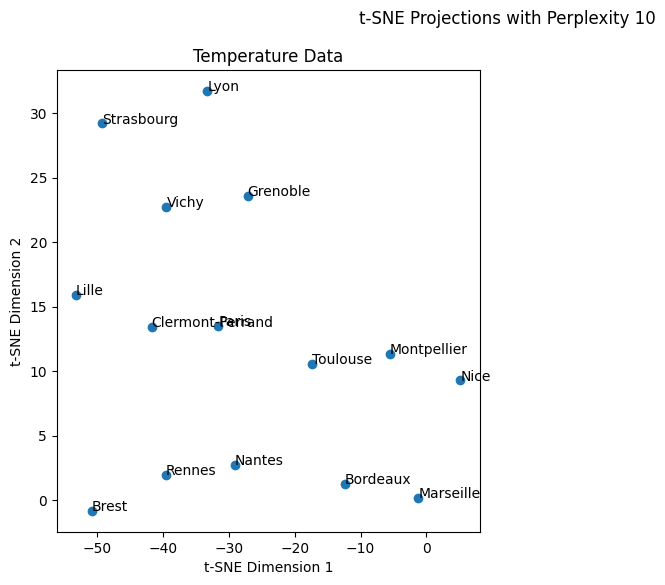

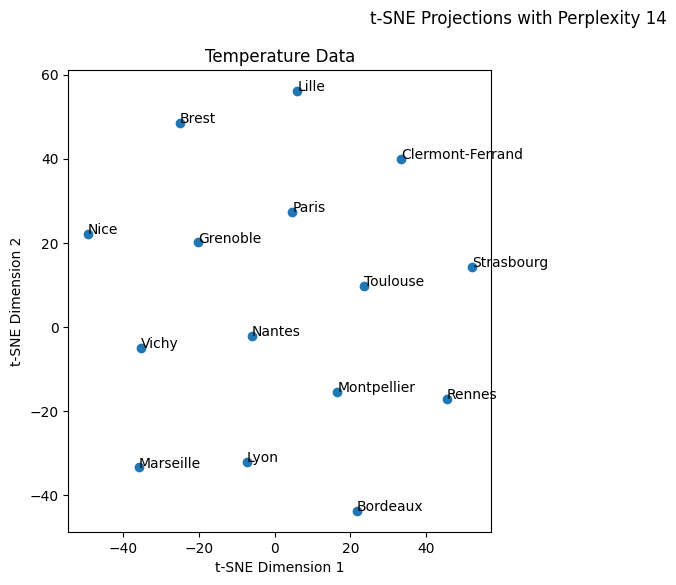

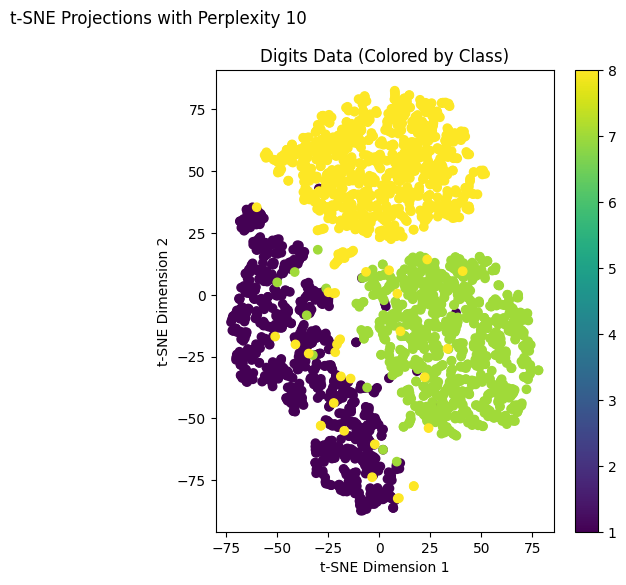

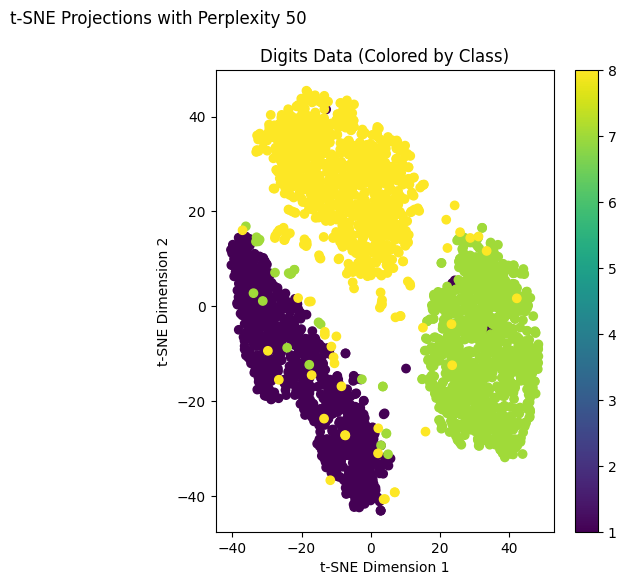

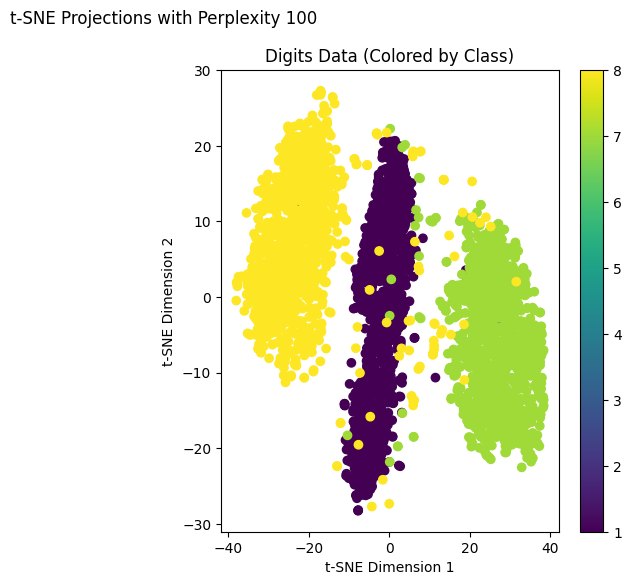

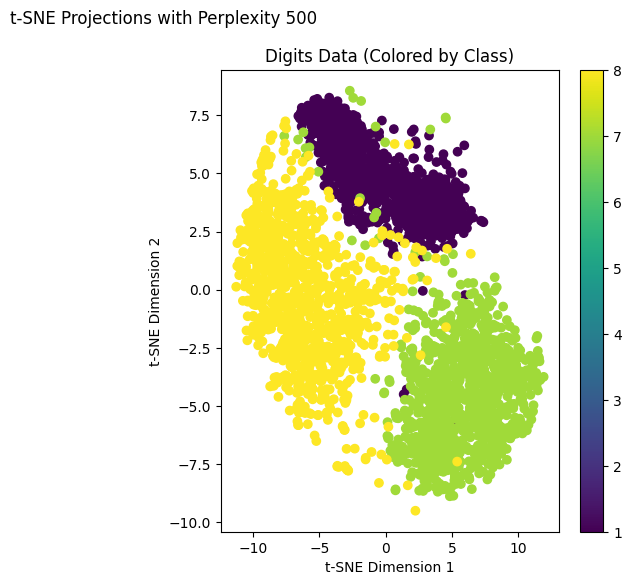

In [ ]:

perplexities_temp = [2, 5, 10, 14]
perplexities_digits = [10, 50, 100, 500] # perplexity should be less than n_samples

for perplexity in perplexities_temp:
    # Compute t-SNE embedding for temperature data
    tsne_temp = TSNE(n_components=2, perplexity=perplexity)
    tsne_result_temp = tsne_temp.fit_transform(x1)

    # Plot t-SNE projections for temperature data
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"t-SNE Projections with Perplexity {perplexity}")

    plt.subplot(1, 2, 1)
    plt.scatter(tsne_result_temp[:, 0], tsne_result_temp[:, 1])
    for i, ville in enumerate(villes):
        plt.text(tsne_result_temp[i, 0], tsne_result_temp[i, 1], ville)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("Temperature Data")

    plt.show()

for perplexity in perplexities_digits:
    # Compute t-SNE embedding for digits data
    tsne_digits = TSNE(n_components=2, perplexity=perplexity)
    tsne_result_digits = tsne_digits.fit_transform(x2)

    # Plot t-SNE projections for digits data
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"t-SNE Projections with Perplexity {perplexity}")

    plt.subplot(1, 2, 2)
    plt.scatter(tsne_result_digits[:, 0], tsne_result_digits[:, 1], c=y2, cmap='viridis')
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("Digits Data (Colored by Class)")
    plt.colorbar()

    plt.show()


*Comment:* The perplexity parameter in t-SNE controls the balance between preserving global and local structure in the data.

Higher perplexity values tend to focus more on preserving global structure and are less influenced by local details. Lower perplexity values emphasize local structure.
The choice of perplexity should be made based on the characteristics of our data and the goals of the notebook.

For the Temperature dataset, higher perplexity may help preserve geographical relations, but it is not fully recover them because the data's inherent dimensionality is different from geographical coordinates.

For the Digits dataset, t-SNE with a suitable perplexity provides a more discriminant embedding than PCA in 2D because t-SNE is better at preserving complex, nonlinear relationships among data points.